In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ram_parcels = gpd.read_file('../data/MSP/Zestimates™️/Attributed_Parcels-shp/Attributed_Parcels.shp')
print(ram_parcels.crs)
hen_parcels = gpd.read_file('../data/MSP/Zestimates™️/County_Parcels-shp/County_Parcels.shp')
print(hen_parcels.crs)
ram_parcels = ram_parcels.to_crs(epsg=26915)

PROJCS["NAD_1983_HARN_Adj_MN_Ramsey_Feet",GEOGCS["GCS_NAD_1983_HARN_Adj_MN_Ramsey",DATUM["NAD_1983_HARN_Adj_MN_Ramsey",SPHEROID["S_GRS_1980_Adj_MN_Ramsey",6378418.941,298.2572221008827]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",100000.0],PARAMETER["Central_Meridian",-93.38333333333334],PARAMETER["Standard_Parallel_1",44.88333333333333],PARAMETER["Standard_Parallel_2",45.13333333333333],PARAMETER["Latitude_Of_Origin",44.79111111111111],UNIT["Foot_US",0.3048006096012192],AUTHORITY["Esri","103768"]]
epsg:26915


In [3]:
ram_crop_df = ram_parcels[['geometry','EMVLand',
'EMVBuildin',
'EMVTotal',
'SchoolDist',
'SiteCityNa',
'YearBuilt',
'ParcelSqua',
'UseType1',]]
print(ram_crop_df)

                                                 geometry   EMVLand  \
0       POLYGON Z ((500289.072 4983990.475 0.000, 5002...  144000.0   
1       POLYGON Z ((495722.268 4989503.982 0.000, 4956...  165600.0   
2       POLYGON Z ((500680.749 4996440.103 0.000, 5006...  106400.0   
3       POLYGON Z ((484446.076 4989227.131 0.000, 4844...  157800.0   
4       POLYGON Z ((484954.312 4988825.749 0.000, 4848...  464900.0   
...                                                   ...       ...   
166751  POLYGON Z ((490816.753 4974670.170 0.000, 4907...       NaN   
166752  POLYGON Z ((490814.241 4974900.681 0.000, 4908...       NaN   
166753  POLYGON Z ((490828.659 4974905.556 0.000, 4908...       NaN   
166754  POLYGON Z ((490996.102 4974744.515 0.000, 4909...       NaN   
166755  POLYGON Z ((490934.488 4974824.503 0.000, 4909...       NaN   

        EMVBuildin   EMVTotal SchoolDist       SiteCityNa  YearBuilt  \
0        2620500.0  2764500.0       0622    NORTH ST PAUL     2010.0   
1  

In [4]:
hen_crop_df = hen_parcels[['geometry',
                           'LAND_MV1',
                           'BLDG_MV1',
                           'TOTAL_MV1',
                           'SCHOOL_DIS',
                           'MUNIC_NM',
                           'BUILD_YR',
                           'PARCEL_ARE',
                           'PR_TYP_NM1']]
print(hen_crop_df)

                                                 geometry   LAND_MV1  \
0       POLYGON ((481758.612 4967622.901, 481758.295 4...  1347000.0   
1       POLYGON ((481827.764 4967621.761, 481887.776 4...  1406000.0   
2       POLYGON ((481827.447 4967582.154, 481827.106 4...  1172000.0   
3       POLYGON ((481799.116 4967582.621, 481798.523 4...  1315800.0   
4       POLYGON ((482035.270 4967618.340, 482035.265 4...  1406400.0   
...                                                   ...        ...   
436811  POLYGON ((459182.890 5010134.070, 459182.593 5...    89000.0   
436812  POLYGON ((459182.593 5010117.011, 459182.088 5...    92000.0   
436813  POLYGON ((459182.088 5010088.072, 459181.121 5...    96000.0   
436814  POLYGON ((459188.571 5010354.829, 459188.062 5...   133000.0   
436815  POLYGON ((459185.118 5010261.707, 459184.346 5...    23000.0   

         BLDG_MV1  TOTAL_MV1 SCHOOL_DIS     MUNIC_NM BUILD_YR    PARCEL_ARE  \
0       1228700.0  2575700.0        271  BLOOMINGTON    

In [5]:
old_hen = hen_crop_df.columns;
cols = ['geometry',
'LandValue',
'BuildValue',
'TotalValue',
'SchoolDist',
'CityName',
'YearBuilt',
'SqMeters',
'LandUse']
assert len(old_hen) == len(cols)
d = dict(zip(old_hen, cols))
print(d)
hen_crop_df = hen_crop_df.rename(columns=d)
print(hen_crop_df)

{'geometry': 'geometry', 'LAND_MV1': 'LandValue', 'BLDG_MV1': 'BuildValue', 'TOTAL_MV1': 'TotalValue', 'SCHOOL_DIS': 'SchoolDist', 'MUNIC_NM': 'CityName', 'BUILD_YR': 'YearBuilt', 'PARCEL_ARE': 'SqMeters', 'PR_TYP_NM1': 'LandUse'}
                                                 geometry  LandValue  \
0       POLYGON ((481758.612 4967622.901, 481758.295 4...  1347000.0   
1       POLYGON ((481827.764 4967621.761, 481887.776 4...  1406000.0   
2       POLYGON ((481827.447 4967582.154, 481827.106 4...  1172000.0   
3       POLYGON ((481799.116 4967582.621, 481798.523 4...  1315800.0   
4       POLYGON ((482035.270 4967618.340, 482035.265 4...  1406400.0   
...                                                   ...        ...   
436811  POLYGON ((459182.890 5010134.070, 459182.593 5...    89000.0   
436812  POLYGON ((459182.593 5010117.011, 459182.088 5...    92000.0   
436813  POLYGON ((459182.088 5010088.072, 459181.121 5...    96000.0   
436814  POLYGON ((459188.571 5010354.829, 459188.

In [6]:
old_ram = ram_crop_df.columns;
cols = ['geometry',
'LandValue',
'BuildValue',
'TotalValue',
'SchoolDist',
'CityName',
'YearBuilt',
'SqMeters',
'LandUse']
assert len(old_ram) == len(cols)
d = dict(zip(old_ram, cols))
print(d)
ram_crop_df = ram_crop_df.rename(columns=d)
print(ram_crop_df)

{'geometry': 'geometry', 'EMVLand': 'LandValue', 'EMVBuildin': 'BuildValue', 'EMVTotal': 'TotalValue', 'SchoolDist': 'SchoolDist', 'SiteCityNa': 'CityName', 'YearBuilt': 'YearBuilt', 'ParcelSqua': 'SqMeters', 'UseType1': 'LandUse'}
                                                 geometry  LandValue  \
0       POLYGON Z ((500289.072 4983990.475 0.000, 5002...   144000.0   
1       POLYGON Z ((495722.268 4989503.982 0.000, 4956...   165600.0   
2       POLYGON Z ((500680.749 4996440.103 0.000, 5006...   106400.0   
3       POLYGON Z ((484446.076 4989227.131 0.000, 4844...   157800.0   
4       POLYGON Z ((484954.312 4988825.749 0.000, 4848...   464900.0   
...                                                   ...        ...   
166751  POLYGON Z ((490816.753 4974670.170 0.000, 4907...        NaN   
166752  POLYGON Z ((490814.241 4974900.681 0.000, 4908...        NaN   
166753  POLYGON Z ((490828.659 4974905.556 0.000, 4908...        NaN   
166754  POLYGON Z ((490996.102 4974744.515 0.000

In [7]:
for c0,c1 in zip(hen_crop_df, ram_crop_df):
    print(c0, c1)
    assert c0==c1
merged = hen_crop_df.append(ram_crop_df)
print(merged)
assert len(hen_crop_df) + len(ram_crop_df) == len(merged)

geometry geometry
LandValue LandValue
BuildValue BuildValue
TotalValue TotalValue
SchoolDist SchoolDist
CityName CityName
YearBuilt YearBuilt
SqMeters SqMeters
LandUse LandUse
                                                 geometry  LandValue  \
0       POLYGON ((481758.612 4967622.901, 481758.295 4...  1347000.0   
1       POLYGON ((481827.764 4967621.761, 481887.776 4...  1406000.0   
2       POLYGON ((481827.447 4967582.154, 481827.106 4...  1172000.0   
3       POLYGON ((481799.116 4967582.621, 481798.523 4...  1315800.0   
4       POLYGON ((482035.270 4967618.340, 482035.265 4...  1406400.0   
...                                                   ...        ...   
166751  POLYGON Z ((490816.753 4974670.170 0.000, 4907...        NaN   
166752  POLYGON Z ((490814.241 4974900.681 0.000, 4908...        NaN   
166753  POLYGON Z ((490828.659 4974905.556 0.000, 4908...        NaN   
166754  POLYGON Z ((490996.102 4974744.515 0.000, 4909...        NaN   
166755  POLYGON Z ((490934.488 4

In [9]:
# we need an index
merged.index = [x for x in range(1, len(merged.values)+1)]

KeyboardInterrupt: 

In [10]:
print(merged)

                                                 geometry  LandValue  \
0       POLYGON ((481758.612 4967622.901, 481758.295 4...  1347000.0   
1       POLYGON ((481827.764 4967621.761, 481887.776 4...  1406000.0   
2       POLYGON ((481827.447 4967582.154, 481827.106 4...  1172000.0   
3       POLYGON ((481799.116 4967582.621, 481798.523 4...  1315800.0   
4       POLYGON ((482035.270 4967618.340, 482035.265 4...  1406400.0   
...                                                   ...        ...   
166751  POLYGON Z ((490816.753 4974670.170 0.000, 4907...        NaN   
166752  POLYGON Z ((490814.241 4974900.681 0.000, 4908...        NaN   
166753  POLYGON Z ((490828.659 4974905.556 0.000, 4908...        NaN   
166754  POLYGON Z ((490996.102 4974744.515 0.000, 4909...        NaN   
166755  POLYGON Z ((490934.488 4974824.503 0.000, 4909...        NaN   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
0        1228700.0   2575700.0        271  BLOOMINGTON      1965   

We at *least* need a dependant variable

In [8]:
merged = merged[merged['TotalValue']>0]
merged = merged[merged['LandUse']!='INDUSTRIAL-PREFERRED']
merged = merged[merged['LandUse']!='COMMERCIAL-NON PREFERRED']
print(merged)

                                                 geometry  LandValue  \
1       POLYGON ((481827.764 4967621.761, 481887.776 4...  1406000.0   
7       POLYGON ((481895.460 4967437.821, 481894.355 4...  3274200.0   
10      POLYGON ((481645.700 4967622.029, 481645.463 4...  1327200.0   
11      POLYGON ((481707.157 4967475.052, 481757.422 4...  1367700.0   
24      POLYGON ((481514.550 4967033.552, 481511.872 4...  2943500.0   
...                                                   ...        ...   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   
166735  POLYGON Z ((487708.287 4988212.972 0.000, 4876...  1060100.0   
166736  POLYGON Z ((487827.746 4987864.908 0.000, 4877...  3214700.0   
166737  POLYGON Z ((487887.227 4988416.586 0.000, 4879...   612800.0   
166738  POLYGON Z ((487887.227 4988416.586 0.000, 4878...   104200.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
1         935900.0   2341900.0        271  BLOOMINGTON      1968   

Drop some more easy ones:

In [9]:
merged = merged[merged['LandUse']!='COMMERCIAL-PREFERRED']
merged = merged[merged['LandUse']!='Commercial']
print(merged)

                                                 geometry  LandValue  \
33      POLYGON ((481832.343 4967266.149, 481836.856 4...  3791100.0   
36      POLYGON ((482014.676 4967158.503, 482016.808 4...  4766000.0   
37      POLYGON ((482011.984 4967031.893, 482009.045 4...      100.0   
38      POLYGON ((482031.858 4967158.222, 482033.179 4...      100.0   
39      POLYGON ((482032.353 4967262.844, 482031.907 4...    14000.0   
...                                                   ...        ...   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   
166735  POLYGON Z ((487708.287 4988212.972 0.000, 4876...  1060100.0   
166737  POLYGON Z ((487887.227 4988416.586 0.000, 4879...   612800.0   
166738  POLYGON Z ((487887.227 4988416.586 0.000, 4878...   104200.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
33        766900.0   8159800.0        271  BLOOMINGTON      2001   

In [10]:
merged = merged[merged['BuildValue']>0]
print(merged)

                                                 geometry  LandValue  \
33      POLYGON ((481832.343 4967266.149, 481836.856 4...  3791100.0   
78      POLYGON ((480811.880 4966313.138, 480811.712 4...  5004000.0   
79      POLYGON ((480872.289 4966267.679, 480872.189 4...   193000.0   
80      POLYGON ((480872.149 4966229.596, 480837.101 4...   162000.0   
81      POLYGON ((480836.998 4966101.673, 480836.990 4...    70600.0   
...                                                   ...        ...   
166727  POLYGON Z ((492083.209 4978434.841 0.000, 4920...     3700.0   
166731  POLYGON Z ((495593.025 4980446.346 0.000, 4955...   101300.0   
166732  POLYGON Z ((489932.044 4974880.150 0.000, 4899...   347900.0   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
33        766900.0   8159800.0        271  BLOOMINGTON      2001   

In [11]:
merged = merged[merged['LandUse']!='UTILITY-PREFERRED']
merged = merged[merged['LandUse']!='VACANT.*']
print(merged)

                                                 geometry  LandValue  \
78      POLYGON ((480811.880 4966313.138, 480811.712 4...  5004000.0   
79      POLYGON ((480872.289 4966267.679, 480872.189 4...   193000.0   
80      POLYGON ((480872.149 4966229.596, 480837.101 4...   162000.0   
81      POLYGON ((480836.998 4966101.673, 480836.990 4...    70600.0   
82      POLYGON ((481068.726 4966101.428, 481054.223 4...  1088500.0   
...                                                   ...        ...   
166727  POLYGON Z ((492083.209 4978434.841 0.000, 4920...     3700.0   
166731  POLYGON Z ((495593.025 4980446.346 0.000, 4955...   101300.0   
166732  POLYGON Z ((489932.044 4974880.150 0.000, 4899...   347900.0   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
78      30019000.0  35023000.0        271  BLOOMINGTON      1969   

In [13]:
print(merged['LandUse'].value_counts())

RESIDENTIAL                   269286
Res 1 unit                    141262
CONDOMINIUM                    44975
TOWNHOUSE                      25643
CONDO GARAGE/MISCELLANEOUS     13878
                               ...  
Childrens Homes                    1
Schools-Priv Res                   1
Co Admin-TaxForf                   1
Skyways                            1
Elderly Liv Fac                    1
Name: LandUse, Length: 79, dtype: int64


In [14]:
merged = merged[merged['LandUse']!='.*GARAGE.*']
merged = merged[merged['LandUse']!='Skyways']
merged = merged[merged['LandUse']!='Childrens Homes']
merged = merged[merged['LandUse']!='Schools-Priv Res']

print(merged)

                                                 geometry  LandValue  \
78      POLYGON ((480811.880 4966313.138, 480811.712 4...  5004000.0   
79      POLYGON ((480872.289 4966267.679, 480872.189 4...   193000.0   
80      POLYGON ((480872.149 4966229.596, 480837.101 4...   162000.0   
81      POLYGON ((480836.998 4966101.673, 480836.990 4...    70600.0   
82      POLYGON ((481068.726 4966101.428, 481054.223 4...  1088500.0   
...                                                   ...        ...   
166727  POLYGON Z ((492083.209 4978434.841 0.000, 4920...     3700.0   
166731  POLYGON Z ((495593.025 4980446.346 0.000, 4955...   101300.0   
166732  POLYGON Z ((489932.044 4974880.150 0.000, 4899...   347900.0   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
78      30019000.0  35023000.0        271  BLOOMINGTON      1969   

In [18]:
print(merged['LandUse'].value_counts())

RESIDENTIAL                      269286
Res 1 unit                       141262
CONDOMINIUM                       44975
TOWNHOUSE                         25643
CONDO GARAGE/MISCELLANEOUS        13878
                                  ...  
SEASONAL LAKESHORE RESTAURANT         2
Elderly Liv Fac                       1
Sr Citizens Fac                       1
Co Admin-TaxForf                      1
MOBILE HOME PARK                      1
Name: LandUse, Length: 76, dtype: int64


In [19]:
merged = merged[merged['LandUse']!='EASONAL LAKESHORE RESTAURANT']
merged = merged[merged['LandUse']!='Elderly Liv Fac']
merged = merged[merged['LandUse']!='Sr Citizens Fac']
merged = merged[merged['LandUse']!='Co Admin-TaxForf']
merged = merged[merged['LandUse']!='MOBILE HOME PARK']
merged = merged[merged['LandUse']!='CONDO GARAGE/MISCELLANEOUS']

print(merged)

                                                 geometry  LandValue  \
78      POLYGON ((480811.880 4966313.138, 480811.712 4...  5004000.0   
79      POLYGON ((480872.289 4966267.679, 480872.189 4...   193000.0   
80      POLYGON ((480872.149 4966229.596, 480837.101 4...   162000.0   
81      POLYGON ((480836.998 4966101.673, 480836.990 4...    70600.0   
82      POLYGON ((481068.726 4966101.428, 481054.223 4...  1088500.0   
...                                                   ...        ...   
166727  POLYGON Z ((492083.209 4978434.841 0.000, 4920...     3700.0   
166731  POLYGON Z ((495593.025 4980446.346 0.000, 4955...   101300.0   
166732  POLYGON Z ((489932.044 4974880.150 0.000, 4899...   347900.0   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
78      30019000.0  35023000.0        271  BLOOMINGTON      1969   

In [35]:
print(merged['LandUse'].value_counts().tail(55))

INDUSTRIAL-NON PREFERRED              458
Sp Tax District                       430
RESIDENTIAL MISCELLANEOUS             330
Church                                317
Muni Srvc Other                       315
Charit Inst                           223
Schools-Public                        161
T E Misc Co D 11                      124
Charit Inst-Res                       100
Colleges-Private                       83
Co Srvc Other                          70
Muni Srvc Ent                          67
COOPERATIVE HOUSING-MASTER             66
UTILITY-NON PREFERRED                  63
Church-Residence                       52
SORORITY/FRATERNITY HOUSING            51
NON 4BB COMPLIANT                      49
State Property                         47
Church - Other                         43
Schools-Private                        43
Church-Other Res                       39
NURSING HOME                           33
Hospital-Private                       31
T E Misc Co D 1                   

In [36]:
merged = merged[merged['LandUse']!='INDUSTRIAL-NON PREFERRED']
merged = merged[merged['LandUse']!='Hospital-Public']
merged = merged[merged['LandUse']!='Nursing Homes']
merged = merged[merged['LandUse']!='SOCIAL CLUB']
merged = merged[merged['LandUse']!='State Acquired']
merged = merged[merged['LandUse']!='Sp Tax District']
merged = merged[merged['LandUse']!='Church']
merged = merged[merged['LandUse']!='RAILROAD']


print(merged)

                                                 geometry  LandValue  \
78      POLYGON ((480811.880 4966313.138, 480811.712 4...  5004000.0   
79      POLYGON ((480872.289 4966267.679, 480872.189 4...   193000.0   
80      POLYGON ((480872.149 4966229.596, 480837.101 4...   162000.0   
81      POLYGON ((480836.998 4966101.673, 480836.990 4...    70600.0   
82      POLYGON ((481068.726 4966101.428, 481054.223 4...  1088500.0   
...                                                   ...        ...   
166727  POLYGON Z ((492083.209 4978434.841 0.000, 4920...     3700.0   
166731  POLYGON Z ((495593.025 4980446.346 0.000, 4955...   101300.0   
166732  POLYGON Z ((489932.044 4974880.150 0.000, 4899...   347900.0   
166733  POLYGON Z ((500813.732 4978301.435 0.000, 5008...    63000.0   
166734  POLYGON Z ((500905.627 4978265.045 0.000, 5008...   104700.0   

        BuildValue  TotalValue SchoolDist     CityName YearBuilt  \
78      30019000.0  35023000.0        271  BLOOMINGTON      1969   

In [37]:
print(merged['LandUse'].value_counts().tail(55))

COOPERATIVE HOUSING                   3844
RESIDENTIAL-ZERO LOT LINE             3420
Apt 4+ units                          2569
SEASONAL-RESIDENTIAL REC              1584
Industrial                            1212
TRIPLEX                                948
LOW INCOME RENTAL                      646
FARM                                   624
RESIDENTIAL MISCELLANEOUS              330
Muni Srvc Other                        315
Charit Inst                            223
Schools-Public                         161
T E Misc Co D 11                       124
Charit Inst-Res                        100
Colleges-Private                        83
Co Srvc Other                           70
Muni Srvc Ent                           67
COOPERATIVE HOUSING-MASTER              66
UTILITY-NON PREFERRED                   63
Church-Residence                        52
SORORITY/FRATERNITY HOUSING             51
NON 4BB COMPLIANT                       49
State Property                          47
Schools-Pri

In [38]:
merged = merged[merged['LandUse']!='INDUSTRIAL']
merged = merged[merged['LandUse']!='FARM']
merged = merged[merged['LandUse']!='RESIDENTIAL MISCELLANEOUS']
merged = merged[merged['LandUse']!='ER Shelter']
merged = merged[merged['LandUse']!='SRR']
merged = merged[merged['LandUse']!='Sp Tax District']
merged = merged[merged['LandUse']!='Cemetery-Private']
merged = merged[merged['LandUse']!='GOLF COURSE']

print(merged['LandUse'].value_counts().tail(55))

CONDOMINIUM                           44975
TOWNHOUSE                             25643
RESIDENTIAL-TWO UNIT                  12334
RESIDENTIAL LAKE SHORE                 7661
Res 2-3 units                          6655
APARTMENT                              4899
COOPERATIVE HOUSING                    3844
RESIDENTIAL-ZERO LOT LINE              3420
Apt 4+ units                           2569
SEASONAL-RESIDENTIAL REC               1584
Industrial                             1212
TRIPLEX                                 948
LOW INCOME RENTAL                       646
Muni Srvc Other                         315
Charit Inst                             223
Schools-Public                          161
T E Misc Co D 11                        124
Charit Inst-Res                         100
Colleges-Private                         83
Co Srvc Other                            70
Muni Srvc Ent                            67
COOPERATIVE HOUSING-MASTER               66
UTILITY-NON PREFERRED           

In [39]:
merged = merged[merged['LandUse']!='AG PRESERVE']
merged = merged[merged['LandUse']!='Q Golf Course']
merged = merged[merged['LandUse']!='Agricultural']
merged = merged[merged['LandUse']!='VACANT LAND-RURAL RESIDENTIAL']
merged = merged[merged['LandUse']!='SEASONAL LAKESHORE RESTAURANT']
merged = merged[merged['LandUse']!='State Property']
merged = merged[merged['LandUse']!='SORORITY/FRATERNITY HOUSING']
merged = merged[merged['LandUse']!='Industrial']

print(merged['LandUse'].value_counts().tail(40))

RESIDENTIAL                           269286
Res 1 unit                            141262
CONDOMINIUM                            44975
TOWNHOUSE                              25643
RESIDENTIAL-TWO UNIT                   12334
RESIDENTIAL LAKE SHORE                  7661
Res 2-3 units                           6655
APARTMENT                               4899
COOPERATIVE HOUSING                     3844
RESIDENTIAL-ZERO LOT LINE               3420
Apt 4+ units                            2569
SEASONAL-RESIDENTIAL REC                1584
TRIPLEX                                  948
LOW INCOME RENTAL                        646
Muni Srvc Other                          315
Charit Inst                              223
Schools-Public                           161
T E Misc Co D 11                         124
Charit Inst-Res                          100
Colleges-Private                          83
Co Srvc Other                             70
Muni Srvc Ent                             67
COOPERATIV

In [40]:
merged = merged[merged['LandUse']!='Comm Serv-Donations Congr Charter']
merged = merged[merged['LandUse']!='Charit Inst']
merged = merged[merged['LandUse']!='Student Hse']
merged = merged[merged['LandUse']!='Muni Srvc Other']
merged = merged[merged['LandUse']!='Schools-Public']
merged = merged[merged['LandUse']!='MH Park']
merged = merged[merged['LandUse']!='T E Misc Co D 11']
merged = merged[merged['LandUse']!='UTILITY-NON PREFERRED']

print(merged['LandUse'].value_counts().tail(40))

Res 1 unit                            141262
CONDOMINIUM                            44975
TOWNHOUSE                              25643
RESIDENTIAL-TWO UNIT                   12334
RESIDENTIAL LAKE SHORE                  7661
Res 2-3 units                           6655
APARTMENT                               4899
COOPERATIVE HOUSING                     3844
RESIDENTIAL-ZERO LOT LINE               3420
Apt 4+ units                            2569
SEASONAL-RESIDENTIAL REC                1584
TRIPLEX                                  948
LOW INCOME RENTAL                        646
Charit Inst-Res                          100
Colleges-Private                          83
Co Srvc Other                             70
Muni Srvc Ent                             67
COOPERATIVE HOUSING-MASTER                66
Church-Residence                          52
NON 4BB COMPLIANT                         49
Church - Other                            43
Schools-Private                           43
Church-Oth

In [41]:
merged = merged[merged['LandUse']!='Apprenticeship Training Facilities']
merged = merged[merged['LandUse']!='NON-PROFIT COMMUNITY ASSN']
merged = merged[merged['LandUse']!='Hospital-Private']
merged = merged[merged['LandUse']!='Colleges-Private']
merged = merged[merged['LandUse']!='COOPERATIVE HOUSING-MASTER']
merged = merged[merged['LandUse']!='Church-Residence']
merged = merged[merged['LandUse']!='MH Park Class I']
merged = merged[merged['LandUse']!='NON 4BB COMPLIANT']

print(merged['LandUse'].value_counts().tail(40))

RESIDENTIAL                  269286
Res 1 unit                   141262
CONDOMINIUM                   44975
TOWNHOUSE                     25643
RESIDENTIAL-TWO UNIT          12334
RESIDENTIAL LAKE SHORE         7661
Res 2-3 units                  6655
APARTMENT                      4899
COOPERATIVE HOUSING            3844
RESIDENTIAL-ZERO LOT LINE      3420
Apt 4+ units                   2569
SEASONAL-RESIDENTIAL REC       1584
TRIPLEX                         948
LOW INCOME RENTAL               646
Charit Inst-Res                 100
Co Srvc Other                    70
Muni Srvc Ent                    67
Church - Other                   43
Schools-Private                  43
Church-Other Res                 39
NURSING HOME                     33
T E Misc Co D 1                  30
T E Misc Co D 16                 24
College-Priv Res                 24
Colleges-Public                  17
Res V Land                       15
T E Misc Co D 4                  15
Federal Property            

In [42]:
merged = merged[merged['LandUse']!='Trans Housing']
merged = merged[merged['LandUse']!='Co Srvc Ent']
merged = merged[merged['LandUse']!='Comm Services-Non Revenue']
merged = merged[merged['LandUse']!='Colleges-Public']
merged = merged[merged['LandUse']!='College-Priv Res']
merged = merged[merged['LandUse']!='Church - Other']
merged = merged[merged['LandUse']!='Charit Inst-Res']
merged = merged[merged['LandUse']!='NURSING HOME']

print(merged['LandUse'].value_counts().tail(40))

RESIDENTIAL                  269286
Res 1 unit                   141262
CONDOMINIUM                   44975
TOWNHOUSE                     25643
RESIDENTIAL-TWO UNIT          12334
RESIDENTIAL LAKE SHORE         7661
Res 2-3 units                  6655
APARTMENT                      4899
COOPERATIVE HOUSING            3844
RESIDENTIAL-ZERO LOT LINE      3420
Apt 4+ units                   2569
SEASONAL-RESIDENTIAL REC       1584
TRIPLEX                         948
LOW INCOME RENTAL               646
Co Srvc Other                    70
Muni Srvc Ent                    67
Schools-Private                  43
Church-Other Res                 39
T E Misc Co D 1                  30
T E Misc Co D 16                 24
T E Misc Co D 4                  15
Res V Land                       15
Federal Property                 14
Schools-Pub Res                  12
T E Misc Co D 10                  9
Name: LandUse, dtype: int64


In [43]:
merged = merged[merged['LandUse']!='Co Srvc Other']
merged = merged[merged['LandUse']!='Muni Srvc Ent']
merged = merged[merged['LandUse']!='Schools-Private']
merged = merged[merged['LandUse']!='Church-Other Res']
merged = merged[merged['LandUse']!='T E Misc Co D 1']
merged = merged[merged['LandUse']!='T E Misc Co D 16']
merged = merged[merged['LandUse']!='T E Misc Co D 4']
merged = merged[merged['LandUse']!='Res V Land']
merged = merged[merged['LandUse']!='Federal Property']
merged = merged[merged['LandUse']!='Schools-Pub Res']
merged = merged[merged['LandUse']!='T E Misc Co D 10']


print(merged['LandUse'].value_counts().tail(40))

RESIDENTIAL                  269286
Res 1 unit                   141262
CONDOMINIUM                   44975
TOWNHOUSE                     25643
RESIDENTIAL-TWO UNIT          12334
RESIDENTIAL LAKE SHORE         7661
Res 2-3 units                  6655
APARTMENT                      4899
COOPERATIVE HOUSING            3844
RESIDENTIAL-ZERO LOT LINE      3420
Apt 4+ units                   2569
SEASONAL-RESIDENTIAL REC       1584
TRIPLEX                         948
LOW INCOME RENTAL               646
Name: LandUse, dtype: int64


3571234.059945504


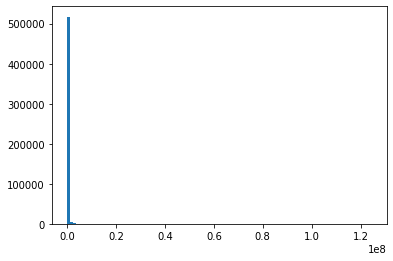

In [47]:
plt.hist(merged['TotalValue'], bins=100)
print(merged[merged['LandUse']=='Apt 4+ units']['TotalValue'].mean())

Looks like we're going to have to take out big apartments. This is just too hard with multiple types of properties.

In [48]:
merged = merged[merged['LandUse']!='Apt 4+ units']


In [50]:
print(merged[merged['LandUse']=='LOW INCOME RENTAL']['TotalValue'].mean())
print(merged[merged['LandUse']=='COOPERATIVE HOUSING']['TotalValue'].mean())

2496811.3003095975
161951.1706555671


In [51]:
merged = merged[merged['LandUse']!='LOW INCOME RENTAL']
merged = merged[merged['LandUse']!='LOW INCOME RENTAL']

(array([2., 4., 2., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 161951.17065557,  236086.65959191,  310222.14852826,
         384357.63746461,  458493.12640096,  532628.61533731,
         606764.10427365,  680899.59321   ,  755035.08214635,
         829170.5710827 ,  903306.06001904,  977441.54895539,
        1051577.03789174, 1125712.52682809, 1199848.01576444,
        1273983.50470078, 1348118.99363713, 1422254.48257348,
        1496389.97150983, 1570525.46044617, 1644660.94938252,
        1718796.43831887, 1792931.92725522, 1867067.41619156,
        1941202.90512791, 2015338.39406426, 2089473.88300061,
        2163609.37193696, 2237744.8608733 , 2311880.34980965,
        2386015.838746  , 2460151.32768235, 2534286.81661869,
        2608422.30555504, 2682557.79449139, 2756693.28342774,
        2830828.77236409, 2904

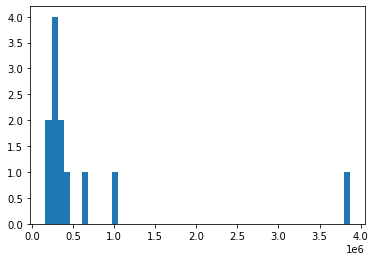

In [61]:
means = []
uses = ['RESIDENTIAL',                  
'Res 1 unit',                   
'CONDOMINIUM',                   
'TOWNHOUSE',                     
'RESIDENTIAL-TWO UNIT',          
'RESIDENTIAL LAKE SHORE',         
'Res 2-3 units',                  
'APARTMENT',                      
'COOPERATIVE HOUSING',            
'RESIDENTIAL-ZERO LOT LINE',      
'Apt 4+ units',                   
'SEASONAL-RESIDENTIAL REC',       
'TRIPLEX']
for u in uses:
    means.append(merged[merged['LandUse']==u]['TotalValue'].mean())
    
plt.hist(means, bins=50)

In [62]:
means = zip(uses, means)
for z in means:
    print(z)

('RESIDENTIAL', 352000.5466270062)
('Res 1 unit', 272379.3447636307)
('CONDOMINIUM', 235258.7392996109)
('TOWNHOUSE', 266967.6636898959)
('RESIDENTIAL-TWO UNIT', 318856.6969353008)
('RESIDENTIAL LAKE SHORE', 999073.0322412218)
('Res 2-3 units', 278509.30127723515)
('APARTMENT', 3868725.6174729536)
('COOPERATIVE HOUSING', 161951.1706555671)
('RESIDENTIAL-ZERO LOT LINE', 263694.5321637427)
('Apt 4+ units', nan)
('SEASONAL-RESIDENTIAL REC', 678198.1691919192)
('TRIPLEX', 432169.40928270045)
('LOW INCOME RENTAL', nan)


(array([1., 1., 4., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([161951.17065557, 203807.26373485, 245663.35681413, 287519.44989342,
        329375.5429727 , 371231.63605198, 413087.72913126, 454943.82221055,
        496799.91528983, 538656.00836911, 580512.10144839, 622368.19452768,
        664224.28760696, 706080.38068624, 747936.47376553, 789792.56684481,
        831648.65992409, 873504.75300337, 915360.84608266, 957216.93916194,
        999073.03224122]),
 <a list of 20 Patch objects>)

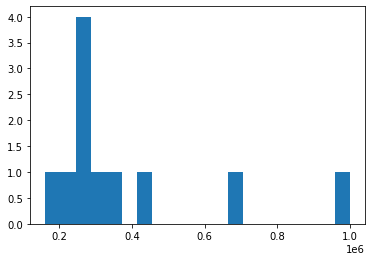

In [64]:
merged = merged[merged['LandUse']!='APARTMENT']
means = []
uses = ['RESIDENTIAL',                  
'Res 1 unit',                   
'CONDOMINIUM',                   
'TOWNHOUSE',                     
'RESIDENTIAL-TWO UNIT',          
'RESIDENTIAL LAKE SHORE',         
'Res 2-3 units',                  
'COOPERATIVE HOUSING',            
'RESIDENTIAL-ZERO LOT LINE',                   
'SEASONAL-RESIDENTIAL REC',       
'TRIPLEX']
for u in uses:
    means.append(merged[merged['LandUse']==u]['TotalValue'].mean())
    
plt.hist(means, bins=20)

In [65]:
means = zip(uses, means)
for z in means:
    print(z)

('RESIDENTIAL', 352000.5466270062)
('Res 1 unit', 272379.3447636307)
('CONDOMINIUM', 235258.7392996109)
('TOWNHOUSE', 266967.6636898959)
('RESIDENTIAL-TWO UNIT', 318856.6969353008)
('RESIDENTIAL LAKE SHORE', 999073.0322412218)
('Res 2-3 units', 278509.30127723515)
('COOPERATIVE HOUSING', 161951.1706555671)
('RESIDENTIAL-ZERO LOT LINE', 263694.5321637427)
('SEASONAL-RESIDENTIAL REC', 678198.1691919192)
('TRIPLEX', 432169.40928270045)


In a different project I'd evaluate how this effects each different type of house, but right now I'm eying that normal distro around 300k...

Lakeshore, Triplex, Seasonal, you're out of here. Now I suppose I need to get rid of Res 2-3 as well for continuity.

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 2., 0., 0., 0., 0., 1.,
        0., 0., 1.]),
 array([161951.17065557, 171453.63945414, 180956.10825271, 190458.57705128,
        199961.04584985, 209463.51464843, 218965.983447  , 228468.45224557,
        237970.92104414, 247473.38984271, 256975.85864129, 266478.32743986,
        275980.79623843, 285483.265037  , 294985.73383557, 304488.20263415,
        313990.67143272, 323493.14023129, 332995.60902986, 342498.07782843,
        352000.54662701]),
 <a list of 20 Patch objects>)

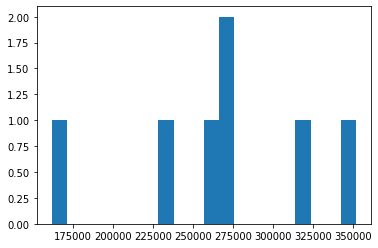

In [66]:
merged = merged[merged['LandUse']!='RESIDENTIAL LAKE SHORE']
merged = merged[merged['LandUse']!='TRIPLEX']
merged = merged[merged['LandUse']!='Res 2-3 units']
merged = merged[merged['LandUse']!='SEASONAL-RESIDENTIAL REC']

means = []
uses = ['RESIDENTIAL',                  
'Res 1 unit',                   
'CONDOMINIUM',                   
'TOWNHOUSE',                     
'RESIDENTIAL-TWO UNIT',          
'COOPERATIVE HOUSING',            
'RESIDENTIAL-ZERO LOT LINE']
for u in uses:
    means.append(merged[merged['LandUse']==u]['TotalValue'].mean())
    
plt.hist(means, bins=20)

Looking good. Now to put the other data back in, but first this will simplify some stuff.

In [67]:
merged['geometry'] = merged['geometry'].representative_point()
print(merged)

                              geometry  LandValue  BuildValue  TotalValue  \
81      POINT (480824.145 4966127.583)    70600.0     76700.0    147300.0   
86      POINT (480848.310 4966114.384)    18500.0    116900.0    135400.0   
87      POINT (480851.040 4966125.474)    14200.0     61300.0     75500.0   
88      POINT (480851.076 4966133.238)    14100.0     68300.0     82400.0   
89      POINT (480851.111 4966141.105)    14200.0     71700.0     85900.0   
...                                ...        ...         ...         ...   
166721  POINT (492442.096 4977430.012)      500.0      2500.0      3000.0   
166722  POINT (493105.041 4982263.006)   136700.0    124400.0    261100.0   
166731  POINT (495580.832 4980427.754)   101300.0    240900.0    342200.0   
166733  POINT (500848.117 4978310.924)    63000.0    105400.0    168400.0   
166734  POINT (500887.775 4978283.547)   104700.0    164700.0    269400.0   

       SchoolDist     CityName YearBuilt      SqMeters      LandUse  goodUs

In [77]:
merged.to_file('../data/MSP/final/merged.shp')

In [2]:
merged = gpd.read_file('../data/MSP/final/merged.shp')

In [3]:
import census

In [4]:
print(len(merged))

500772


In [4]:
sample = merged.sample(10000)
merged.to_file('../data/MSP/final/merged.shp')

In [4]:
sample = gpd.read_file('../data/MSP/final/merged.shp')

In [5]:
sample = merged.sample(25000)
cens = census.blockDataAtCoords(sample, threaded=True)

epsg:4269
epsg:4269
396402 27 123 03080093504 4
 27 053 026820 4
107793 27 053 110900 3181026
364822 27 053 011998 5
 27 123 037403 5
4533 41357427 053 101200 1
 27 123 040302 3
430595 27 35823123  040504 2
487618 4921372727  27 123 040503 2
 053 025603 4
123216476  03420133997227 053 012001 1
 360501 1
 27 123 031100 1
27 053 024500 3
274097 27 053 026909 1
448859 27 123 030900 495536 27 123 041107 2
3
38847165545 27 123 031801 1
 27 053 021001 1
221802473588  27 053 027501 4
27 123 040803 1
66429 9730527 053 023902 1
 27409044 053 110800 6
 27 123 034602 3
284715 27 05328534 27 053 100800 025805 1
 1
261305500207 27 123 032200 2
137716 17970 27 053 102500 3
27 27 053 008300 1
39334 177747 27 053 025907 2
053 70597 105400  27 053 026714 1
1
205794 27 053 012001 7
27 053 026714 1
131268 29110127  053 026511 3
2714622 27 05312891   27 053 109700 2
020600 2
118095 27 053 111100 1
053 026610 2
292387 27 261669 27 053 005902 1
453314 27 123 040603 3
053 026818 2
94365 27 053 026708 1
44809

363273 27 123 040504 1
333989 27 053 023700 3
438881 27 123 041001 2
373774 27 123 040707 3
483236 27 123 031000 5
49485 27 053 109000 2
415354 27 123 041400 3
380603 27 123 031100 3
461471 27 123 042601 2
310221 27 053 025907 3
142661 27 053 026822 2
428581 27 123 040705 1
444100214644 27 053 026716 1
 27 123 043000 4
126545 27 053 026707 3
372655 27 123 040707 3
422241 27 123 040603 1
492954498179 27 123 037100 5
 27 123 040200 2
191789 27 053 026714 2
180962 27 053 011998 3
468799 27 123 041700 2
500472 27 123 036000 2
462654 27 123 040707 1
413152 27 123 042504 1
195349350366328730 27 053 026908 2
 199009138565 27 15877 27 053 027101 1
 169969 27 053 002700 1
475019 27 123 042202 053 103000 1
27158610 27 053 102800 1
27 053 023801 5
2
142502443311289228 27 053 026205 3
 27 287835401845 27 123 037601 1
 452826 27 123 040705 1
2712507159816    053 449202 27 123 040301 1
6767 27 05340575427 053 022700 2
2752741 27 053 021200 4
123199751 27  175014 27 053 026613 1
   350398 02050005305

476417121820 27 053 026402 1
443499 27 123 042302 3
15213  27 053 020500 1
27 123 042302 2
223564 27 053 026810 4
463385 27 123 042501 2
252788 27 053 106400 1
170699 27 053 026021 2
46168451877 27 123 030201 2
117314 27 053 110100 1
 2711327 27 053 008500 3
172283 27 053 053 020101 2
 122500 3
454229449670 27 123 042504 1
404336 27 123 043000 4
 47060327 41714027   27123 041105 1
123 042101 1
 476651 123 040703 3
27 123 042302 1
373735 27 123 041400 3
52482 27 053 020102 1
191938 27 053 025701 1
241746 27 053 026814 4
114163 389130 27 123 037200 5
27 053 026820 1
227803 27 053 126200 1
391108 27 123 030400 1
176348 27 053 026812 1
3949 27 053 000601 3
43723459375 27 053 025605 4
 27 123 040401 3
35962 27 053 025603 1
279579 27 053 026206 3
335724 27 053 026609 1
43714 395874 27 123 042302 2
27 053 021501 1
363433 27 283169 27 053 020302 1
123 040200 2
101746 27 053 026612 1
453597 27246525  27 053 003800 2
123 037403 4
404146 27 123 037602 3
65126 27 053 021001 1
248873 27 053 027400 

407927 27 123 041900 3
304634 27 053 026715 3
383698 27 123 031801 3
304070 27 053 026715 2
215461 27 053 025801 1
15659 27 053 026508 3
145302 42386727  27 123 040901 2
053201043 27 053 021505 3
243010 025403 1
234921 27 053 011704 3
 16017327  053 026814 5
27 053 023000355655 1
 27 053 026104 1
138346 27 053 002400 2
377734 27 123 035700 2
268052 27 053 105204 2
134419 27 053 025301 1
472659 38508127  123 032300 4
27 123 034601 2
285740 27 053 024005 1
104608359808 27 123 041104 2
338311 27 053 026906  27 053 025205 4
269914 27 053 026613 2

87776 27 053 125700 1
122577 27 053 026402 4
317928 27 053 026908 1
100352 27 053 026007 3
94573 27 053 026708 3
265623 27 053 026713 1
255014 27 053 023400 5
275134 27 053 024100 2
42881 27 053 027300 1
52599 27 053 021200 2
195325 27 053 023801 4
380042389408 27 123 037200 1
 27 123 034702 1
25161 27 053 008100 2
468114 27 123 035000 1
415201 27 123 041601 2
244034 27 053 027001 1
321663 27 053 105100 3
337312 27 053 020303 2
32610 27 053 02070

190039 27 053 026605 2
302589 27 053 021601 3
489500 27 123 035500 2
294717 27 053 026906 3
118201 27 053 111100 4
421995 27 123 040601 1
9373 27 053 026706 1
60879 27 053 110400 3
8300 27 053 026706 2
479525 27 123 041601 3
457471 27 123 041001 2
360871 27 123 040301 2
158575 27 053 102900 1
493028 27 123 041800 2
79058 27 053 026005 1
237818 27 053 126100 2
118567 27 053 111100 4
267517 27 053 024500 1
158084199174 27 053 027400 3
 313174 27 053 026207 1
27 053 102800 1
164009 27 053 026708 4
467591 27 123 040503 2
95924 27 053 110000 1
458080 27 123 041500 1
93985 27 053 026820 4
138301 27 053 002400 2
413950 27 123 030704 2
48636384706240870 27 053 027602 5
  27 053 108900 3
27 123 034601 2
121593 27 053 026007 1
452730 27 123 040705 1
262857 27 053 026103 1
204521 27 05374078 025803 1
 27 053 109800 3
371433 27 123 041400 1
56666250871 27 053 026815 3
 25479 27 053 008100 3
27 053 027300 4
259272 27 053 024700 2
14152 27 053 026403 1
249171 27 053 027602 3
340494129665439435  27 1

355852 27 053 027504 2
454156 27 123 040302 2
220677 27 053 023000 3
155188 27 053 010700 2
421643 27 123 041500 3
9317134400 27 053 025205 2
 27 053 026706 2
37571 27 053 000300 1
476848331967 27 053 106500 2
 27 123 042700 2
415599 27 123 040703 1
387945446223  27 123 040504 1
27309977 123  4649627 053 025907 4
034400  272
 053 025100 3
248641 27 053 023300 1
771 27 053 108700 1
448243 27 123 030703 3
29223927331 27 053 100200 3
 27 053419621 27  123 026818 2
036600 3
17566 27 053 025401 1
108636 27 053 011000 2
216988 27 053 012001 4
47955 27 053 107600 4
42198437122 27 123 041002 1
 27 053 022200 3
382705 27 123 034701 1
310200 27 053 025907 4
206771243193360762 27 123 042102 1
 27 426957 27 123 040603 2
27  34266 27 053432527 27 123 040704 1
053  397168026710 27 123 032300 1
053  026820 4
4023802
 210266 27 053 023000 2
2227711
496783 376748 27 123 042402 3
40384927  053 126200 1
27 84724 27 053 025601 2
27  123 030300 7
123 148148 03720027 053 111500 5
 54290 227
 053 021300 2
46

  44208624461427214048 27 053 026816 2
 27 053 27 123 036700 2
 123 037100 2
27 053 107500 1
27 36210 27 053 109000 2
012101  053 026816 4
1102206161159 27 053 021100 2
 48366624437127 27 053 026909 2
  27
05395922349189 27 053 125800 3
 026509 2
 27 053 110000 1
 123 041001 2
270276 27 053 105700 1
182629 27 053 023600 1
430669 27 123 034202 1
379809 27 123 030602 3
29121 27 053 100900 5
26774 27 053 109200 1
394873 275597 27 053 024500 2
27 123 033500 2
19592 27 053 109400 1
384488 27 123 030703 3
29727 27 053 025903 2
2015269717 27 053 021505 4
 27 053 025201 3
3483351217 27 053 026507 2
 27 053 000601 2
241453 27 053 027002 2
196998 27 053 104000 3
462715 27 123 040707 1
193835 27 053 012102 1
117691 27 053 110200 2
416527 27 123 041200 3
197482 27 053 025905 3
94735 27 053 364575 27 123 026708037403 3
 3
199842 27 053 027602 2
130769 87443 27 053 027601 2
27 053 100800 2
29186289719 27 053 244946027700 27 053  011800 5
 274
 053 100900411957 27 123 041200 1
458459 27 123 475093367

27  27158843053273671   123 034202024200 3
  27 053 026711 1
1977553 27 053 025906 4
27 300000
 05327 053 026022 1
 025903 5
49065159284237553   27 053 026015 3
2727  390284 27 123 031900 1
133895 27 053 025301 2
053 126100 4
053 108800 1
105786 27 053 110100 2
460572352307 27 123 041104 2
174232 27 053 026713 4
383915 27 123 031100 2
22192 27 315337  27 053 0270020533358827 159234 053   2727 3
021504  053 026612  020400053 026015 3
208299 27  1
2
053 003200 2
1
359574418027 27 123 041107 1
 27 123 035000132844 3
 27 053 026702 2
64002 27 053 023100 1
405248 27 123 043000 4
368927 27 123 040200 1
248274 27 053 023300 4
199280 27 053 026201 1
38388 27 053 021200 1
283620 27 053 026716 2
100763 27 053 026404 3
350005 27 053 026104 1
164109 27 053 026708 4
123636 498767 27 123 040401 3
12714227 053 000102 5
 38404027 053 026707 2
 27 123 031801 3
276769 27 053 105500 2
179557 27 053 110500 3
206052 27 053 023802 3
101410 27 053 020400 4
283286 27 053 020302 1
328665 27 053 026908 2
327007

41693 27 053 026014 2
485966 27 123 034202 3
69063 27 053 021503 3
40616464826 27 053 101200 3
5629 27 053 026402 1
 398584 27 123 030800 4
223052 27 05327 123 033200 2
 238686 27 053 126100 1
026810 3
358934 27 053 026907 1
73016 27 053 109100 6
307559 27 053 107500 1
137399 27 053 011703 2
120042497330 27 123 042101 1
 27 053 001100 2
85735 27 053 010700 3
226477 27 053 111500 4
75695 319356 2727 053 024300 4
 053 100700 3
372602340126 27 053 024600 1
 27 123 041602 136634
 27 053 109100 2
239068 27 053 026016 3
236271 27 053 103700 2
300247 27185349 414241 394109 0532727 053 026021 1
   123 040803 3
026022 1
27 123 036700 4
338615 27 053 026906 2
271977 27 053 026811 1
185588160387 27 053 026302 3
 27 053 026021 1719992
 27 053 122500 3
86015 48630127 27 053 100900 3
 123 034202 3
308302288005 27 053 026022 1
 35260627279066 27 053 023700 1
  053 27107600 2
 053 026712 1
59062 27 053 027101 1
195627 27 053 023801 5
346907 27352176 053 024801 1
 27 053 026713 4
381952 27102827  123 0

33405 27 053 026612 1
10414 27 053 025201 1
99745352837 27 053 026007 3
450977 27 123 040604 3
 27 053 026712 1
349577 27 053 026018 3
63166133281 27 053 026909 2
 27 053493344457211 022901 4
  27 27 123 041001 1
68448 27 053 022200 1
123 030800 4
64433 342434 27 053 026208 1
27 053 020102 2
401441 27 123 035800 1
313654369696 27 123 040703 1
37950 27 053 021200 2
 27 053 027700 3
2531266334652765  27 053 026016 1
 2727 053 021200 4
 053 022902 1
473679 27 123 041602 2
271522 27 053 027700 4
211169 27 053 314122027203  27 053 027700 3
1
208806 27 053 025903 5
53664 27 053 021100 2
193395 27 053 012102 3
57688 27 053 021501 3
237709 27 053 126100 4
95283 27 053 025401 2
107756 27 053 110900 3
88557 27 053 101600 2
49577 27 053 109000 2
494314 27 123 040705 1
277844 27 053 026018 1
206590 27 053 023802 1
221373 27 053 026202 2
437977 27 123 040402 1
363419 27 123 042501 1
14213 27 053 026403 1
208596 27 053 025903 5
475711 27 123 041601 1
422551149007 27 053 102300 1
 27 123 042202 1
449

2602 27 053 000601 1
468532 27 123 041800 3
413422263969  27 123 042504 1
27 053 027002 3
86146 27 053 100800 1
443290 27 123 040200 2
78928340936 27 053 106900 2
 27 053 026014 3
330683 27 053 024300 1
313717 27 053 027700 3
472560 27 123 032300 3
386376137476 27  27053 011703 123 042900 1
 1
95742 27 053 025403 1
446033 27 467659 27 123 040502 2
123 034701 2
141291 27 053 100200 2
310145 27 053 025907 4
50622 27 053 022901 2
401034 27 123 037500 3
160491 27 053 026302 3
34899 27 053 027102 1
129780 27 053 026020 3
429566 27 123 040601 3
64853 27 053 101200 149557 27 053 026015 2
3
249836 27 053 026512 5
15380117776 27 053 008300 1
 27 053 026710 6
274211 27 053 024400 2
171642 27 053 122600 1
296916 27 053 104900 3
213545 27 053 026816 5
468027 27 123 040503 2
335944 27 053 026609 1
466476 27 123 040604 1
152871 27 053 026710 2
261458 27 053 005901 2
124013 27 053 000102 4
127800 27 053 011800 1
293156 27 053 026716 1
411470 27 123 040801 2
467749 27 123 041500 3
130250 27 053 026402

36049 27 053 107600 1
234455 27 053 111600 2
389225 27 123 035200 3
451914426800 27 123 040601 3
195951 27 053 023801 2
192857 27 053 025803 3
385782 27 123 042900 1
 27 123 041900 3
231411 27 053 026811 2
173926 140012 27 053 026101 1
27 053 020903 3
415041318145 268581145083 27 053 026910 2
11372 27 053 008400 1
 54435 27 053 021300 2
2727 34289 27 053 026820 4
 327106 27 053 026809 1
2799317 27 053 101600 1
 053 105201 2
124529 27 053 000102 3
351060 27 053 027504 1
053  123 040100 1
026907 123401 1
9542527 27 053 025403 259691470233 053 2727   053123  024902 2
042601 2
4114122  2746253
000102  1
27 053 025100 3
 123 040801 2
384083 27 123 030602 2
205892 27 053 012001 7
376634 27 123 030702 2
382464 27 123 031600 4
149191 27 053 102300 2
59595 27 053 025605 4
169368 27 053 021700 2
4140 27 053 000603 3
440784 27 123 037403 4
367012 27 123 040707 1
101020 27 053 027700 1
250568 27 053 026815 4
346757 27 053 024801 1
158602 27 053 102800 1
365603 27 123 030201 4
336898 27 053 026809 

251217 27 053 026715 1
367410 27 123 041105 1
248838 27 053 027400 4
408183 27 123 036900 1
478139 27 123 030400 2
394372 27 123 036700 4
35266 27 053 025603 3
323043 27 053 025907 1
156262430898 27 123 040200 1 
27 053 243351111300 202504  27272 053 026710 4

 053475604 27 123 040703 1
 393344026606  271
391131 123 036700 1
 27 123 036600 1
156600 34476627  05327 053 111300 1
 020303 3
254592 27 053 023400 5
227206 27 053 012003 2
228727401983 211096 2727  40242727 053368209053 126200 026201 2
 27 123 035100 2
  2
27  123 040705 2
123 037500 3
119800 27 053 001100 1
179742 27 053 111100 2
499102231793137405 27 053 011703 2
5262 27 053 022200 2
  27 123 043000 2
27 379572 27 123 030601 2
49953 27 053 475332 27 053109000 1 026811 3

123 041301 1
46948 27 053 025605 1
56739 27 053 027300 4
497399 27 123 037601 1
420898 27 123 036700 4
202837 358133 27 27053 027102 3
 053 026816 3
308902 27 053 022801 1
248647 27 053 023300 1
475375 27 123 041002 2
72197 27 053 025702 4
345948224291 27 05

185445 27 053 026021 1
42648 27 053 022101 2
54116 27 053 021300 2
328521 27 053 026908 2
351034 27 053 027504 1
147440 27 053 110800 3
246570 27 053 103900 2
330734 27 053 024600 3
17326 27 053 025401 3
402460 27 123 034900 2
401844 27 123 043000 2
461243212909 27 053 026611 1
 27 123 041105 2
334305 27 053 026208 1
15340 27 053 026508 1
421695 27 123 040706 2
433241 27 123 041106 1
492893 27 123 041900 1
369154 27 123 040705 2
193368 27 053 012102 1
197282 27 053 021800 2
277016 27 053 105500 2
31443 27 053 022101 2
86851 27 053 100800 1
94912 27 053 026910 1
48873469833 31249327   2712327 053 023502 5
  042401053 108800 2
 2
7807410317 27 053 025201166579 27 053 111200 1
258641 27 053 024901 1
  271
 053 023903 3
407524 27 65568123 27 053182172 27 053 023600 1
 021001 1
 030300 5
440067 27 123 042601 1
460649373010  27 123 041302 1
27 123 041104 2
8137 27 053 027002 1
45429 27 053 026613 2
49161 27 053 108900 1
106971 27 053 009500 3
483338 27 123 031000 2
121785 27 053 026402 1
191

477431 27 123 040704 3
413395 27 123 040803 4
441381 27 123 041105 2
304632 27 053 026715 3
293319 27 053 026716 1538 27 053 108800 2
1
448655 27 123 040200 1
58555 27 053 026613 2
3420770492 27 053 026714 1
 27 053 026820 4
138817 27 053 103000 2
447753 27 123 040603 1
218227 27 053 012001 2
109117 27 053 100500 2
486191 27 123 034202 3
186525 27 053 022301 296866 27 053 109900 2

399999 27 123 033300 2
88743 27 053 125700 3
332905 27 053 106700 4
270876 27 053 026206 1
376569 27 123 041900 3
463033 27 123 042402 1
184092 27 053 025905 4
118182382102  27 123 27 053 111100 4
033000 1
213115 27 053 026816 4
81064 27 053 022400 1
51443412226 27 053 020101 3
385370 27 27 123 034601 2
 123 040502 2
37648 27 053 000300 2
359385 27 053 026909 2
271767128176 27  053 27 053 011800 2
026811 1
235567 27 053 011704 3
64817 27 053 101200 3
199064 27 053 027400 2
160447 27 053 026302 3
278406136815  2782077 1117 27 053 020804 3
328492 27 053 026908 3
 27 053 108600 1
05327  011703 4
053 023501 2
44

278788 27 053 023501 1
147323 27 053 110800 2
311704 27 053 023502 5
385818 27 123 037000 3
438719 27 123 040604 1
352311 27 053 026713 4
227025 27 053 012003 3
402469 27 123 036300 3
496757 27 123 032600 1
267119 27 053 024400 2
33528 27 053 026612 1
69043 27 053 021503 3
161802 5576 27 053 026402 1
27 053 026612 4
262281 2736913  27 053 000300 1
053 026018 1
85174 27 053 109900 4
470672 27 123 042101 1
467727495681 27 123 040604 5
 27 123 042504 2
358318 27 053 027001 1
129288271030 27 053 026208 1
 27 053 104000 1
342062 27 053 007700 1
281863327597332122  27 053 106600 3
 2727 053 026807 053 026609 3
 1
82345 27 053 020903 3
234638 27 053 012003 3
487447467228  27 39645 27 053 025907 2
27123 123 030201 1
 035700 224001036391121307 27 053 027201 2
285964  
27 123 042601 3
44837827 27 123 030704 1
  27 053 026103 2
053 024100 2
149460489278 27 27 123 035900 1
493023103573266991 27 053 024400 2
   053 026019 1
27 053 026708 1
27 123 041301 1487747 27 123 035500 1

395191 27 123 032400

22521404150352849 27 053 026712 1
  27 053 02661227 1 
123 034400 2
210917 27 053 026201 2
251347250136 27 053 027002 2
361836 27 123  042102 1
27 053 026903 3
341241 27 053 006800 3
16839123443 27 7468727 053 111300 4
 053  27026508 3
 053 109100 5
457313 27 123 041001 2
175880 2789333276254 27 053 106500 2
  053 026812 1
27 053 026005 3
499061 27 123 032000 2
151974231464  27 053 026823 1
27 053 026811 2
381736 27 123 030703 3
249506 27 053 026512 4
399693 27 123 033500 2
109527 27 053 001700 2
12196940676 27 327990 27 053 026715 3
27 053 026402 1
 0532890811666 27 053 008400 2
 442578 023901 3
27 053  27 123 043000100400  273349 27 053 109800 1

1760822
 4212527  27 053 022102 1
05344220 026812 2
 27 053 020801 2
38678035538233805   88878 27 053 101600 3
27354067 27 053 107500 2
27 053 025603 3
 123 031801 3
2753329 27 053 021300 4
 053 011703 2
474929 27 123 042202 2
319714 27 053 024004 1
278963 27 053 023501 1
209914 27 053 026022 1
456747 27 123 042101 1
467351 27 123 041107 1
4

176612 27 053 026812 1
20215 27 053 100900 1
10201 27 053 025201 1
223548 27 053 026810 3
34964496450  27 123 040902 2
27 053 025603 4
415807 27 123 040703 2
198124 27 053 026022 1
36755 27 053 109100 1
227999 27 053 126200 1
190772 27 053 026702 1
279371351005 27 053 026206 3
 27 374109 05327 027504 1
267283212380  27 053 026605 2
 12327 053 024400  030702 2
5299490 27 053 025906 3

317955 27 053 026908 1
153251 27 053 026708 5
289384 27 053 027700 3
289342 27 053 027503 4
48308 27 053 108800 3
3111426946657380 27 053 027201 5
358726 27 162879 27 053 026823 2
053  137755 27 053 102500 2
2727 306391 27 053 024003 1
100522 27138418 27 053 102500 1
  021900053 026907 1
05376106 354409 026404 3
272668198678 27 053 023400 2
   12727 053 125900 3
334699 27 053 020301 1
  27 053 026208 3
053 208309 27 053 104100 2
053404186215660 27 053 025802 1
02140017157275202 27 053 024100 2
74623 27 053 109100 3
  
 105600285215 21 27 053 025401 1
27
 
 455258123334564 2747239527 035700 2
    0531765354

 27 053 026613 2
217415 27 053 012001 3
383594 27 123 034500 1
407868 27 123 040801 2
397576 27 123 032300 4
57443 27 053 021501 1
76965 27 053 101300 1
367769 27 123 040200 1
407652 27 123 037100 3
260044 27 053 126100 1
117606 27 053 110200 2
7264 27 053 020500 1
182218240751 27 053 027602 6
 27 053 023600 1
302630 27 053 021601 3
401343 27 123 037500 5
481582 27 123 041105 1
476874 27 123 042700 2
390421282919 27 053 026819 2
 27 123 030704 1
400047388530 27 123 037100 5
 27 123 036400 1
104452 27 053 025205 4
218299 27 053 012003 1
205434 27 053 111300 6
472308 27 123 032300 4
12741 27231833  27 053 053 109700 2
026811 3
106333 27 053 110100 3
255462 27 053 023400 4
163533 27 053 026812 1
418167165120 27 053 025702 3
 27 123 035100 2
48181 27 053 108800 3
388179 27 123 037200 4
495509 27 123 041107 2
72857 27 053 109100 6
86389 27 053 100800 2
434875 27 123 041107 2
28834 27 053 100400 2
179161 27 053 025701 5
66524 27 053 026014 2
288027 27 053 026022 1
22245896931 27 053 109900 2

223282 27 053 026816 5
131189 27 053 027602 4
477683 27 123 030703 1
208407 27 053 104100 2
73977 27 053 109800 3
279367 27 053 026206 3
121253124405  27 053 000102 3
27 053 101200 4
494201 27 123 036900 1
218335 27 053 103400 2
355311 27 053 026104 2
74028 27 053 109800 3
73388 27 053 109800 1
207443 27 053 012001 6
220158 27 053 023000 1
91368 27 053 020700 4
378304 27 123 036700 3
34771 27 053 026820 4
369421 27 123 040402 1
219426 27 053 025903 5
393047188676 27 27 123 036800 1
 053 021504 3
91408 27 053 020700 3
68256 27 053 022301 1
222661 27 053 026611 4
89009 27 053 023903 3
283409 27 053 020302 1
14117 27 053 026403 1
395462 27 123 030800 3
194810401907 27 123 036400 2
21411 27 053 027700 1
 27472527189695 27 053 026605 1
 4807 27 053 000603 4
198503 27 053 023200 3
 053 023801 1
27 123 032300 2
27208 27 053 109200 2
8822738132  27 053 125700 3
27 404761 27 123 037500 2
053183384 27 053 021700 4
 51899 27 053 020101 2
129043127999  27 053 102600 2
021200 3
27 053 011800 1
4362

77816 224549184861  27 053 025905 2
27790 27 053 108700 2
27  053186948 053 023903 3
 27026714 3
 05341655490592 27 123 040601 3
306851 27 053 024003 3
 022302 3
73457223326 27  38266727053 022700 3
   053 026816 5
158042727  053 123 27 053 027101 1
109800  0307032
 3091213 27 053 022802 2

112911 27 053 100200 2
452586 27 123 041500 1
104077 27226908  27 053 012003 1
053 027102 2
368376 27 123 040901 2
445127 2760678 123 27 032300 053 110400 4
 1
72396 27 053 110500 5
255522 27 053 023400 4
305497 27399324 27 123 043000 3
 053 026907 1
412608 27 123 040502 3
210971 27 053 026201 2
5132 27 053 022200 2
397144 27 123 030800 1
345760 27 053 026715 4
466010 27 123 040401 1
115248 27 053 026707 1
449690 27 123 040706 3
321821 27 053 106500 1
118949 27 053 101200 1
175560 27 053 026613 1
377477 27 123 041302 2
68338 27 053 022102 2
170552 27 053 025903 5
253090 27 053 026016 1
148039 27 053 111500 1
283394490895418549 27 123 043000 3
 27 053 020302 1
 27 123 037601 3
477372 27 123 040705 1


49458 27 053 109000 2
438123 27 123 040402 2
436579 27 123 040604 4
6775 27 053 020500 2
164691 27 053 025702 4
432710218972 27 053 104100 1
 27 123 040601 3
496773 27 123 032600 1
350882 27 053 027501 1
244964 27 053 011800 5
384232 27 123 030602 2
30211113663910483 27 053  27 053 021601 1
011703 3
358539 27 053 026907 1
24593970176 27 053379766  27 026613 2
92394 4215612580832074723577 27 053 000601 2
164561 27 053 026909 3
 2750027 27448337 27 123 030703  196967 27 053 104000 3
27 123 041601 1
  27352430 27 053 026713 3
27 053 100400 3
448027 053  408095 27 123 040703 3
511132727 27 053 020101 1
434216 35214 27 053 025603 3
2746830927380 27 053 100200 3
3348311 27 053 125800 3
025201314646 27 053 026606 2
   0531 27  123   030601104000 1

053
114048403912   2123  49565927
053123  2704050327   041400 1
1
  026713 12305327 021100 1
 053 027002 1012001 
 040803123 034701 2
  5
1231  040604 5

3
156282 27 053 111300 2
447567 27 123 031801 4
118221 27 053 111100 4
216392 27 053 012001 1


 272411314491424 27 491229053 053 023801 2
   2702650527 
 3561351232 
  27 053123030601 036600 1
 2
430080  27 123 040601 2
026507 1
344624 27 053 020303 1
70909 27 053 026714 1
454593396532 233157 27 053 026909 3
32693927 27 053 027002 3
  27 123 031200 123 4034870309001  22763372 123
 27 053 022902 1
7672
 034900  27 053 026508 1
3
233470 27 053 026909 3
43261397909 27 123 033500 27 053 027201 3
 3390992 27 123 037403 2

22773 27 053 026612 1
271822437969 27  05327 123 040402 1
 026811 1
412939 27 123 040504 2
353414 27 053 027102 3
435680 27 123 040604 5
132813 27 053 026822 1
439072 27 123 040604 5
371423 27 123 041302 1
255501 27 053 023400 4
22427 27 053 026612 1
142678 27 053 026822 2
136943 27 053 011703 1
182263 27 053 023600 1
243603 27 053 026710 4
348113 27 053 126000 2
423097 400996 27 123 037601 3
27 123 042503 1
393678130709 27 053 027601 1
 27419301  27 123 036500 2
123 036700 3
51410 27 053 020101 1
409922 27 123 040901 1
392504204872 27 053 27 123  259689034601 1
263

88307 27 053 101600 2
325577 27 053 021602 2
305331 27 053 026906 4
475977 27 123 030100 1
313160 27 053 026207 2
275266 27 053 024200 1
443204 27 123 033300 1
347078 27 053 024802 3
4215 27 053 000603 3
219611 27 053 026015 3
482791 27 123 031000 1
381240 27 123 031100 3
82377 27 053 020804 3
481305 99577114248 27 123 042402 4
27 27 053 026820 2
 053320660 27 053 024004 3
 026007 4339822
32253  27 123 04080327 053 020700 1
 1
171795 27 053 122500 2
162755 27 053 026823 3
241837229955 27 053 026101 2
 27 053 026814 4
459617 27 123 040707 2
185424 27 053 026021 1
81916 27 053 021502 1
372696 27 123 041602 1
110002 27 053 458426 27 123 042301 2
101800 1192953249136354641
 27 053 101200 2
  27 381709 27 123 030703 3
27053  10740005336119 212738 27 053 026610 1
1
196378 027602 3
  2727 053 107600 1
479860446367 17282 27 053 025401 3
2773646 27 053 109800 2
 392406 27 27123 036800 2
145199 279334 27 053 026206 3
053338277  381369123  27 123  041400 3
27 123 042501 3
141147362021 27 123 0401

429845 27 123 042102 2
369047 27 123 041900 2
480114 27 123 042602 2
241302 27 053 027101 2
267475 27 053 024500 1
295494 27 053 025805 1
497714 27 123 034202 1
300383 27 053 023501 2
236482 27 053 103600 2138916
 27 053 103600 1
397054 27 123 030704 2
241143 27 053 026505 2
446605 27 123 040601 2
197037 27 053 021700 3
335692179431 27 053 025701 5
 27 053 026609 1
456915 27 123 041400 1
64083 27 053 023100 2
3329688516 27 053 026612  27 053 125700 3
1
104026 27 053 026708 2
401109 27 123 036400 4
267175 27 053 024400 2
6294175812 27 053 026812 2
 27 053 020600 1
345661 27 053 026711 1
53008 27 053 021100 1
436972 27 123 040302 3
52162 27 053 020102 1
25713 27 053 008100 1
201797 27 301957053 026605 1
 27 053 021601 1
186357 27 053 022301 1
130144 27 053 026402 3
69747 27 053 026613 2
23716 27 053 026820 4
283130 27 053 020302 1
95261 27 053 025401 2
32526730540 27 053 026005 2
 27 053 027503 4
109511 27 053 001700 2
428923 27 123 040302 2
9518 27 053 027102 2
176520 27 053357983 42166

396544 27 123 030800 3
29434 27 053 025903 2
133150 27 053430401  026903 3
143715 27 053 026710 327 123 040902 1

486239 27 123 034202 3
128109 27 053 011800 2
115469 27 053 026707 1
3372 27 053 000601 2
300816 27 053 023501 3
224998 27 053 026910 2
5704 27 053 026402 1
463863320422 27 053 024004 3
 27 123 042504 2
240007437001  27 27 123053 026101 2
 040302 3
286829 27 053 105100 36208816731050681  27 123 040601 1
27 053 1112002
 27  053 022901 1
2135998
 27 053 011703 5
197375 27 053 021800 1
314763 27 053 026606 2
194291 27 053 012101 1
290447427197  2727 053 021602 3 123 040601 3

463922 27 123 042503 1
415826 27 123 040707 1
2606 27 053 000601 1
332965 27 053 106700 4
330023 27 053 024500 2
21995319867 27 053 024004  27 053 020400 4
1
336425 27251358 27 053 026903 3
 053 020302 2
335490254073 27 053 026018 2
 27 053 026609 2
17960369618  27 123 27 053 008400 2
041601 2
66603 27 053 026014 2
411836 27 123 041105 3
49079 27 053 108800 1
154652 27 053 026909 3
240214 27 420102053 023

355778 27 053 027504 2
 370359 27 123 031100 1
  36589311628012550027 22344 27 053 026612 1
211084354120  123 040601 2
  2727322711 27 053 025903 3
 27 053 026201 2
368932 27 123 041602 1
27127 053 100700 1
42288722108 106479 27 053 110100 3
315511 27 053 026807 3
204289
 053219255 27 053 103400 3
284741 27 053 024100 3
422019 27 123 040601 1
 224431 27 053 026714 3
 27 123 031802 2
 123 034701 3
39552 27 053 025907 2
 27 053 020400 4
491316 27 123 036600 1
106200263633 27 053 026505 2
  05327 110200 2
464523 27 123 042503 2
 4
053 025702 1
351862 27 053 020301 1
403055 27 123 034900 2
161202 27 053 021100416104400995 27 123 037500 3
 68210 27 053 022200 1
 227 123 040706 2

391990437341 27 123 041002 2
 27 123 036500 4
344895 27 053 020303 2
152359 27 053 026823 3
375634 27 123 040601 2
393762 27 123 032100 2
114458 27 053 026820 2
249053 27 053 027602 4
393436 27 123 036500 2
73048 27 053 109100 6
183865 27 053 021700 4
132974 27 053 027102 2
456181 27 123 041103 2
180339 27 053 0119

1006 27 053 108600 1
280808 27 053 021602 1
278608 27 053 023501 2
216882 27 053 111300 6
149485 27 053 026019 1
58458 27 053 026613 2
488559 27 123 035800 1
256720 27 053 026512 7
418081 27 123 035000 3
499603 27 123 042401 2
216949 27 053 111300 6
456996 27 123 041400 4
156839 27 053 111400 2
481813 27 123 030703 1
479110 27 123 041400 3
134421 27 053 025301 1
162895 27 053 026823 2
320463 27 053 024004 3
418326193532 27 053 012102 27 123 034900 3
 3
32192 27 424850149703053 020700 1
  27 123 041104 1
401724138397 27 123 035100 2
 27 27053 053 026015 2
 002400 2
352691 27 053 026712 2
34951 48250027 053 025603 4
163412 27 053 026823 2
133290 27 053  2767274026909 2
 123375 27 053 000102 1
 27123114408 27 053 026820 2
  053154557 27 053 456222 041302026909 27 123 040604 4
 3 
026014 1
3528472 
23036427371694 27 123 041500 2
 053 026712 1
 27 053 026206 1
117587 27 053 110200 2
88541 27 053 125700 3
121732 27 053 026402 2
136910 27 053 011703 4
136850 27 053 011703 1
219213 27 053 1034

485676 27 123 034202 1
305733 27 053 026906 4
378946 27 123 030702 2
23379 27 053 026508 3
216403 27 053 012001 1
348351 27 053 126000 1
79608 27 053 022102 1
474744 27 123 034602 1
81592 27 053 020804 2
436265 27 123 037000 3
335710 27 053 026609 1
223520 27 053 026810 3
404950 27 123 037500 1
475946 27 123 030100 1
260529 27 053 126100 1
82191 27 053 021503 4
3511 27 053 000601 2
311884 27 053 023502 5
391647 27 123 036500 4
319492 27 053 024004 1
327252 27 053 026807 3
347977 27 053 125900 2
446027 27 123 034701 3
94253 27 053 026708 1
87258 27 053 100800 3
483956 27 123 031801 4
190679 27 053 026702 1
168496 27 053 111300 3
326734 27 053 026610 3
6121 27 053 027300 2
53119 27 053 021300 4
27079 27 053 109200 2
402573 27 123 043000 3
28517 27 053 100800 1
349343 27 053 125900 1
121712 27 053 026402 2
361516 27 123 040200 2
120268 2782297 053 101900 1
 27 053 021503 4
270782 27 053 026206 1
168454 27 053 111300 3
32423738025 27 053 021200 3
119053 27 053 101200 1
 27 053 026208 2
181

 040703385363233110157257 27 053 002200 1
 317170 27 053 026715 3
  10072 27 053 025201 1
127248091 27 053 023300 4
1 053 026910 2

27  
026302380779 27 123 031400 2
123364525 27 123 040707 1
 031801 3
378483 27 123 035700 1
 4101836 27 053 026612 1

232692 27317043 27 053 026715 3
425998 053 026710 5
 14087027 27 053 027601 4
 123 037500 2
414274 27 123 041107 3
263121 27 053 026104 1
246655 27 053 103900 2
37461 27 053 000300 4
80738 27 053 022400 3
154875 27 053 025801 1
409474298770 27 053 025906 4
 27 123 040901 2
179093421691 27 123 040706 2
 27 053 025701 3
342912 27 053 027501 3
55792 27 053 026013 4
5592 27 053 026402 1
191275 27 053 026714 1
399779 27 123 030100 2
496355 27 123 040902 2
61345 27 053 111100 3
198983 27 053 026201 1
119426 27 053 101200 2
57509 27 053 021501 1
479132 27 123 041400 3
219152 27 053 104100 1
39296 27 053 100700 1
35038 27 053 025603 3
362524 27 123 040402 1
165419 27 053 025702 2
89214 27 053 026006 3
343634 27 053 026507 2
31761 27 053 026301 1
1

303615 27 053 026606 3
206531 27 053 023802 1
322020441865 27 27 123 036800  053 106500 3
400036 27 1123 036400 1

294646 27 053 026906 3
360004 27 123 041105 2
123094 27 053 027700 1
5878 27 053 026402 1
384028 27 123 034601 2
81012 27 053 022400 2
402807 27 123 037403 4
238295 27 053 126100 1
173441 189980 27 053 026605 2
44077827 053 027203 2
 27 123 037403 2
364084457549 27 123 042501 2
 27462842 123241699 27 053 026814 3
  482357 041001 1
2727249195   123123 042201 1
27 053 027602 3
 042001 1
6319 27 053 020600 1
55546 27 053 026013 4
474619 27 123 034602 2
167568 27 053 111200 3
481465 27 123 030900 3
322808 27 053 025906 1
255529 27 053 023400 4
31640 27 053 027300 1
96160 27 053 110000 2
403390 27 123 030100 4
117072 27 053 110200 1
320966 27 053 024300 4
27741 27 053 100400312691  27 053 026207 1
3
295719 27 053 023801 3
396827 27 12354390 27 053 021300 2
 031300 2
258060 27 053 026713 1
426504 27 123 042302 1
190108 27 053 027101 3
283963 27 053 026716 1
224980 27 053 027001 

158581 27 053 102900 1
396033 27 123 033300 1
148986 27 053 002200 2
473896 27 123 042201 1
29993 27 053 023901 1
390961174528 27 053 020902 2
 27 123 034601 1
20068 27 053 109400 2
47640418338  27 053 008200 3
27 123 042302 2
76490 27 053 021400 2
192423 27 053 025701 1
178212 27 053 026714 3
455371 27 123 037402 1
16944 27 053 125500 1
140298 27 053 026101 1
205926 27 053 012001 7
193158 27 053384978 27 123 031802 4
 025803 2
213205 27 053 026816 4
85111 14369027 053 109900 4
 316018285904 27 053 024200 3
496044 27 053 026807 5
 336105195813 27 053 023801 4
 27 27 053 026609 2
17832305328989727 21741 27 053 020304 2
 026710 3
  21440 27 053 027700 1
307414 27 053 107500 1
360818 27 123 042700 2
107548123 040801 10701 2712727
   118721053161366 27 053 021100 2
179764 260154 27 053 126100 1
 27 053 101200 1
 05327 053 008500 5
053 110900   2
021602 026909 3
211373 27 053 021001 3
27 053 111100 2
334015 27 053 023700 3
5
313319 27109234 27 053 053238462   27 053 126100 1
001700 1
026207

49939 40466827 27 123 037500 4
 053 109000 1
408280 27 123 042700 3
1600 27 053 108700 2
50926 27 053 411666022901 480284 27 123 042700 3
27 123 041105 3
 2
478863 27 46381 123 030703 1
27 053 025100 3
345614 27 053 026711 1
257847 27 053 020200 5
113327 27 053 026508 2
41631049827124322 27 053 000102 3
25846  27 053 108000 2
27332875 27 053 106700 4
  27 123 040706 3
053 108900 1
362922471338 27 123 042601 2
343511 27 053 026507326056 27 123 042602 1
 1911322
 27 053 026714 1
 27340920 27 053 106900 2
 053 021900 3
106842 27 053 009500 3
208733 27 053 025905 3
151620 27 053 026823 1
249165 27 053 027602 3
478573382049 27 123 031100 3
 27 123 031100 3
130926 27 053 027601 3
219568 27 053 025903 5
173829 27 053 020903 3
305152 27 053 026906 4
21538 27 053 020304 2
298429 27 053 022000 2
301167 27 053 023502 3
432130 27 123 037000 2
206439 27 053 023802 1
480361 27 123 040604 2
167563 27 053 111200 3
277144 27 053 105500 1
295913 37791927  27 123 042900 4
053 024006 2
8897469295 27 123 0

 27333520 053 025802 1
 27205332 27 053 025802 2
 053 023700 1
276708 27 053 105500 4
440021 27 123 042601 1
57384 27 053 027201 5
465126 27 123 041900 2
133887 27 053 025301 2
353428 27 053 027001 1
276765 27 053 105500 4
30541 27 053 026005 2
398042 27 123 031300 1
419179 27 123 036500 4
308759 27 053 022801 1
279036 27 053 023700 1
262332 21834427  27 053 103400 1
053 026018 1
244271 27 053 026909 3
328587 27 053 026908 3
61913 27 053 110500 3
124816 27 053 000102 2
494486 27 123 040705 1
318326 27 053 026907 2
313677 27 053 027700 3
284483 27 053 025802 2
418593 27 123 037601 4207692 27 123 035700 1

47106 27 053 025605 3
8770 27 053 026706 1
208525332353 27 053 105100 1
 27 053 108000 1
344243403803 27 123 037602 2
 27 053 020301 2
400280 27293039  27 053 026716 1
123 036400 1
39944 27 053 023700 3
109811 27 053 101800 2
215064 27 053 026716 1
55327 27 053 023902 1
308092 27 053 107600 2
158958439879  27 123 042602 1
27 053 026015 3
423793 27 123 040401 2
247931 27 053 023200 1
42

179850 27 053 011800 1
415591 27 123 040803 4
336087 27 053 026609 2
186282 27 053 022301 1
349073 27 053 125800 2
299780 27 053 026022 1
297877 27 053 021800 2
404431 27 123 030300 4
459129 27 123 040402 1
340125 27 053 024600 1
186249350420 27 053 026104 3
 27 053 022302 2
333288 27 053 025903 3
497050 27 123 042501 3
217202 27 053 012001 3
49978 27 053 108900 1
482385313001 27 053 27 123 042001 1
334369 026207 1
 27 053 026205 1
193931107357  27289259104967 27 053 025205 5
 2727 053 026205 3
 053 012102 2
 053440837 168768 27 053 102000 3
 27 123 041200 1
011000 3
258411 27382211 27 123 031100 3
 466959 27 123 041200 1
053 024901 2
460212 27 123 042002 2
273903 27 053 027001 2
48412 83276136197247119 27 053 026016 2
 27 053 026613 2
185537 27 053 026021 2
 27 053 011703 3
18828727  32396427 27 053 023700 3
 161182 27 053 021100 2
053212364 27 053 026605 2
125814 417092053 27 123 040703 3
021504 108800 3
  27 053 027101 1
2
313155 27 053 026207 2
110866 27 053 026404 2
242692 27 053 

450599 27 123 033900 1
473219 27 123 032400 1
60109 27 053 110400 2
226721 27 053 111500 4
363172 27 123 042202 2
409601 27 123 040901 1
479245 27 123 042302 5
306827 27 053 024003 3
213256 27 053 026816 4
443949 27 123 043000 5
140219 27 053 026101 1
292435 27 053 026818 2
328111 27 053 026715 3
20749 27 053 026007 2
404704 27 123 036400 3
261527 45695827 27 123 041400 4
 053 005901 1
213227 27 053 026816 4
412617 27 123 041103 1
184780 27 053 025905 4
314086 27 053 027700 3
483669 27 123 041001 2
222248 27 053 021001 2
105393 27 053 025205 3
17834 27 053 008300 2
413643 27 123 041105 1
433711 27 123 040803 1
112749 27 053 100200 1
299001 27 053 025906 3
387487 27 123 031701 2
65476 27 053 021001 1
173041 27 053 026302 1
487736 27 123 035500 1
415901209339 27 053 026022 3
 27 123 040707 1
43157 27 053 026301 1
465108 27 123 041900 2
124126168823390261 27  27 053 000102 4
27 053 102000 3
 123 227198 037100 27 053 012003 2
4
280244 27 053 027501 2
44602841731463103 27 053 026005 3
 27 1

17155 27 053 025401306374 27 053 024003 1
16886710996 2781098 2728341  27 053 102000  10970127 053 100800 4
3   

05305327  053 008500 022400 3008500 3

84249163363  27 053 026910 1
1
 27 053 026823 2
124749 27 053 000102 2
433726125254 27442228226351   123 237581 27 053 126100 4
27 123 034900 2
360272  27 123 040703 2
23169427040803  2
27 053 026510 2
27 053 026811 2
 053 111500 4
208981 27 053 026022 2
1838 27 053 108700 3
1090412366 27 053 009600  27 053 008500 5
2
446940 27 123 031801 1
378350 27 123 031702 1
34834 27 053 026707 1
308153 27 053 107600 2
230816 27 053 026505 1
10744 27 053 108600 3
463424 27 123 042504 1
237750 27 053 126100 2
389485 27 123 032600 3
410238 27 123 041104 1
215876 27 053 025801 3
405950 27 123 030602 1
23261182933 27 053 026508 3
 27 053 023600 2
312867 27 053 026207 2
94492 27 053 026708 3
251009 27 053 026815 1
405451 27 123 037601 2
267534 27 053 024500 1
648 27 053 108700 1
144318 27 053 026710 4
254303 27 053 023400 3
445780 27 123 030300 2
48066

467623 27 123 040704 2
355177 27 053 026104 2
400057 27 123 033300 2
85399 27 053 010700 1
199250 27 053 026201 1
288275 27 053 023502 2
311035 27 053 025907 1
36466966649  27 053 026014 2
27 123 031702 3
243003 27 053 026814 5
146963 27 053 111500 3
324278 27 053 026208 2
312177189669 27 053 023502 5
 27 053 026605 1
81271 27 053 027201 4
19202 27 053 109300 2
313473174374 27 053 020902 2
 27 053 027503 2
400551 27 123 036400 4
372392 27 123 041500 2
462488 27 123 042302 5
356982 27 053 020200 7
432644167109 27 053 111200 2
170235 27 053 025905 1
317950 27 053 026908 1
 27 123 040601 3
398803 27 123 041106 1
295956 27 053 023801 3
458280239334 27 053 026016 3
175102 27265129 27 053 020200 4
 344763 27 053 020303 3
053 27 123 042401 1
 026613 1
326808133329 27 053 026609 1
 27 053 026909 2
169440 27 053 002700 1
342925 27 053 027503 1
118718 27 053 101200 1
433309 27 123 030601 2
346500 27 053 024903 1
439831 27 123 042401 1
155637 27 053 111400 1
453192 68551 27 053 022301 1
27 123 04

233396220655 27 053 023000 3
 27 053 026909 3
123177 27 053 027700 1
119064 27 053 101200 1
130371 27 053 023200 2
165174 27 053 025702 3
65802 27 053 021700 5
454103 27 123 040302 1
443170 27 123 040200 2
344018 27 053 027202 2
176094 27 053 026812 2
339508 27 053 024500 3
491297 27 123 036600 1
38798 27 053 000300 3
167524 27 053 111200 3
357113 27 053 020200 7
1638 27 053 108700 2
77857 27 053 023903 3
467506 27 123 041103 2
63901 27 053 023100 1
486811 27 123 041301 3
462873 27 123 042201 1
138264 27 053 002400 2
256250 27 053 027504 3
420560113633 27 053 026509 2
 27 123 035700446004  27 123 034702 3
1
239264 27 053 026016 3
189821 27 053 026605 2
361939 27 123 040402 2
494242 27 123 031300 2
449580 27425331  32246 27 053 020700 1
27123  040302 2
123 031802 3
405342 27 123 032600 1
279981 27 053 026206 2
311214 27 053 025907 1
74361 27 053 109800 4
414258321838 27 053 106500 1
 27 123 040803 3
332445 27 053 106600 2
121131173317 27 053 026302 2
 27 053 101200 3
173557 27 053 02720

 488307 20824 053 19158627 053 026007 2
27 123 036000 2
27  053 021601 3
 02770027 053 026715 1
185088 27 053 026021 2
 1
254847 27 053 023400 3
53292 27 053 021300 4
351511 27 053 027202 1
6493133414 27 053 021400 3
 27 053 026612 1
69732 27 053 021503 3
206921 27 053 023802 2
140150 27 053 026404 1
151815196805 27 053  104000 3
27 053 026823 1
344418 27 053 020304 3
6973 27 053 020500 2
268166 27 053 105400 1
34856688252 27 053 125800 3
 27 053 125700 3
369181 27 123 040706 3
2256 27 053 000603 2
496200225940 27 053 012003 3
 27 123 040902 1
248773 27 053 023300 2
24227742822 27 053 026301 2
 27 053 026814 3
424188 27 123 042401 1
55723202876 27  053 27 026807053  0260136
 4358997
434804  2727 123 041107 4
 053 026907 1
340315 27 053 024600 1
320843 27 053 024004 3
265068 27 053 020200 3
98414457390 27 123 27 053 110800 6
 041001 2
389578 27 123 037100 4
15181499848 27 123 031200 2
 27 053 020500 2
227796256555 27 053 027602349446   3396273
  2705327 053 000601 2
291375 27 053 026611

488599 27 123 035500 1
481433 27 123 031801 1
479011 27 123 041400 1
220248 27 053 023000 1
9748 113724 27 053 026509 1
27 053 025201 3
347391 27 053 024903 1
131343 27 053 026510 3
468563313796  27 123 041800 2
4652427 053227313 27 053 012003 2
 027700 3
 45927215803 27 053 027101 1
27 27  053 025605 1
123 040402 1
46805539967 27 053 023700 3
 27 311496123  035000 1
27 053 023502 3
293717 27 053 026715 3
217448 27 053 012001 3
390474 27 458496 27 123123  037200 0410011
411960 2 432197 27 123 040604 5

27 123 041200 3
114119305010 27  053 026820 1
364061 27 053 026906 1
27 123 042501 2
367505190959 27 053 026714  27 123 032000 1
400345 27 123 030300 6
1
266340 27 053 024700 1
448605156108 27 053 111300 2
 27 123 040200 1
89310 27 053 026005 3
308273 27 053 107600 2
65720 27 053 021700 5
137037 27 053 011703 4
202082 27 053 026605 1
22950816870 27 053 125500 1
 27 053 026015 1
250461320335  27 053 024004 3
27 053 026815 4
231077 27 053 026811 4
40689248268 27 053 023300 4
 27 053 023901

404931 27 123 035100 1
390085 27 123 031900 2
460167 27 123 042700 2
281715 27 053 026611 3
191604 27 053 026715 1
285433 27 053 024005 2
15777 27 053 026508 2
276624 27 053 105500 2
215487 27 053 025801 1
245956196237 27 053 104000 5
 27 053 104000 1
61336 27 053 111100 3
277340369730  2727 053 025903 4
 123 041601363123 27 123 040502 1
426255 27 123 035100 1
 2
439908 27 123 042602 1
60196 27 053 110400 2
304121 27 053 026715 2
123804 407333488898 27 123 036000 2
 27 053 000102 5
27 373713 27 123 030702 5
378751 27 123 042401 1
123328061386606 27 123 031500 2
129398 27  053040703 404335 27 123 043000 4
 27 053 026020 2
 2026715 
3259774211089 362378 
27 053 026201 2
17706 27 053 008400 2
 27 123 040502 1
27 053 126100 1
331640271058  2727 053 106700  2053430063  
27026206368071 27 123 043000 1
 1
 123 040706 2
9145 27 053 026706 2
388253 27 123 037200 1
340301 27 053 024600 1
289004 27 053 026205 3
55106 27 053 023902 2
245897 27 053 104000 1
385179 27 123 033900 1
308335 27 053 1076


123368462 27 123 036600 2
 
 053 021800 2
2727 053 023903 2
 042503 1
484419123 040705 1
 27 123 031701 1
136128447429 27 123 040503 1
 27 053 011703 4
243052 27 053 026710 4
120429 27 053 101900 3
75978 27 053 100700 4
36878 27 053 000300 1
50737 27 053 022901 3
272782 27 053 026711 2
76910 27 053 101300 1
69709 27 053 021503 3
98372 27 053 110800 6
396430 27 123 030300 6
3454 27 053 000601 2
41788 27 053 021900 3
282282 27 053 026810 1
79611 27 053 022102 1
115120 27 053 026707 1
320689 27 053 024004 3
95818 27 053 110000 1
396672 27 123 032500 3
26226137296 27 053 000300 4
 27 053 026018 1
250619 27 053 026815 4
49508 27 053 109000 1
357852 27 053 026713 2
275365 27 053 024200 1
82974471309 27 123 041700 3
 116494 27 053 110200 1
27 053 026613 2
288716 27 053 026205 2
338688346207455727 27 123 040504 2
400232  27 123 030300  213543 27 053 026816 5
4
2727  053 024902 2
053191069 27 053 026714 1
48306  27 053 108800 026906 2
3
272384237458496715  339470  27 053 024600 1
2534002727 12

195212 27 053 023801 5
299727 27 053 026022 1
203872135833 27 053 026903 1
 27 053 111600 1
358981 27 053 026907 1
55811 27 053 026013 4
496819 27 123 032700 2
80728 27 053 022400 3
24045 27 053 026820 1
447222 27 123 040603 2
406582 27 123 042602 2
457871 27 123 041800 1
396280174329 27 053 021504 1
 27 123 031300 2
188979 27 053 021504 4
86169 27 053 100800 2
89908 27 053 022700 1
473813 27 123 042700 2
467368 27 123 041107 1
24986 27 053 125500 3
454805 27 123 030900 2
237289 27 053 126100 4
211283 27 053 021001 3
140084492871 27 123 041900 1
 44868027 27 053 026404 1
 123 040603 1
324520 27 053 026207 1
411846 27 123 041105 3
201267 27 053 021001 5
390237 27 123 037200 1
37285 27 053 000300 4
338521 27 053 026906 2
232543 27 053 026710 4
163664 27 053 026823 2
402990134826  27 123 037403 5
27 053 025301 1
186004 27 053 022302 2
384575 27 123 031702 3
459261 27 123 040402 1
162174265507158015 302681 27 053 021601 2
 27 053 026612 4
10671  272727 053 108600 3
  053383473 27 123 03450

244558 27 053 012101 1
214681 27 053 026715 2
272916173596 27  27 053 026711 053 027203 2
421183 27 123 040707 1
2
102350 27 053 026509 2
287086 27 053 105100 3
396924 35690 27 123 042402 2
27 053 025603 4
52730 27 053 021200 2
427058 27 123 040503 1
10875 27 053 008500 5
378045303893 27 053 027201 3
 27 123 040200 1
303258 27 053 021601 2
312815 27 053 026207 2
158002 27 053 102100 2
232492 27 053 026710 5
389949 27 123 042900 1
101175 27 053 020400 2
240366 27 053 023300 3
476732 27 123 036000 2
488301 27 123 035800 3
180440419706 436475 27 123 040604 4
 28669327 27 053 105100 1
 053 01199827 123 036600 3
 4
447060 27 123 040603 2
329246397143174397  2727 123 191699 27 053 026714 2
053  026908 030800 1
27 053 020902 2
 4
304258 27 053 026715 2
423273 27 42392 27 053 022101 2
123 040801 133722 
27 053 000601 4
2520 27 053 000603 2
217961 27 053 012001 2
439516 27 123 040604 2
492833 2787067 27 053 100800 3
 123 037402 3
449058 27 123 030601 1
205246 27 053 025802 2
256712 27 053 02651

257957 27 053 020200 1
478189 27 123 030400 2
75255 27 053 010600 3
477573 27 123 042101 2
15152469704 27 123 040100 5
 27 053 020500 3
250477 27 053 026815 4
489190 27 123 035900 1
183922 27 053 021700 3
250778 27 053 026815 3
319058 27 053 024200 2
498827 27 123 031200 3
107235 27 053 009600 4
196481 27 053 104000 5
119010 27 053 101200 1
369120 27 123 041302 1
210204 27 053 122500 1
178976119858 27 053 001100 2
 33105627  6012927 053 024600 2
 053 27025701 274293 3
 35434627053 110400 2
 375864327367399071 27053 27 123 040901 1
278503 27 123 032300 4
  053 107500 2
432539 2727  230987 27 053 027101 2
 145971 27 053 025302 2
02410027498109053    12327 123 033200 2
  026807053 023501 2
 16678011042201 

96023 27 053 109900 1
 249368271 476729 27 123 042401 2
27
 053 053 026512 4
 111200 1
418266 27 123 034900 3
275155 27 053 024200 1
115007 27 053 026707 1
341595 27 053 107000 2
141954 27 053 026512 2
212050 27 053 021002 1
32229636489193832  27 053 026812 3
 27 12327  042503053 10650

474203358725 27 123 037000 1
 27 053 026907 1
247457 27 053 026016 1
180506 27 053 011800 2
483105 27 123 031000 5
435236 27 123 031200 1
191146 27 053 026714 1
16642 27 053 025401 1
119328 27 053 101200 2
470552 27 123 042101 2
401935 27 123 037500 3
42432 27 053 022101 2
169678 27 053 002700 2
175732 27 053 026812 2
258747 27 053 024901 2
433763272646 27 053 020301 1
216067 27 053 111400 4
 27 123 040803 2
468884 27 123 041700 2
358912 27 053 026907 1
155597 27 053 111400 1
79167 27 053 022101 1
249331 27 053 026512 4
246932 27 053 026020 2
421607 27 123 041601 1
147177 27 053 110800 2
270372 27 053 105700 2
238593 27 053 103700 3
199259 27 053 026201 1
287054 27 053 105100 3
84910 27 053 125500 1
337689 27 053 026715 3
457969 27 123 041601 3
128037 27 053 111100 1
407486 27 123 033000 2
59879 27 053 110400 1
298256 27 053 022000 2
359558 27 123 040801 2
42950224434 27 053 125500 3
 235506 27 053 011704 3
27 123 041106 2
227474 163210 2727 053 053  026812 2
126200 1
336543 27 053 020

57457 27 053 021501 1
127187 27 053 026707 2
27792 27 053 100400 1
97761 27 053 110800 4
106964 27 053 009500 3
229390 27 053 026015 2
114004 27 053 027101 2
34515 27 053 026812 3
296217 27 053 024006 1
394643 27 123 033800 2
68451 27 053 022200 1
295532 27 053 025805 1
29072 27 053 100800 1
85343 27 053 109900 4
378 27 053 108700 1
411052 27 123 040801 2
440535 27 123 040707 3
144081 27 053 026710 4
242476 27 053 026814 2
184052 27 053 021700 3
240416 27 053 023300 3
34567754997 27 053 023902 2
62420 27 053 026711 1
 27 053 022901 4
476095358023 27 053 027102 3
 2775345 27 053  123 042700 1
187446100700 1136741353796 435463 27 27 
123053 041103 1
   027400 2
2745748127 053 026509 1
  27 123 041001 1
265533053222987 27 053  026810106200 2755345 27 053 023902 1
  236549 27 053 103600 2
 22349022

 27 053 026810 3
053 026713 1
490381 27 123 035800 1
365097 27 123 040504 2
451143 27 123 042402 3
459797314648 27 053 026606 2
 27 123 040503 1
402106 27 123 034900 2
135375 27 053 011703 5
49

142889 27 053 026822 2
217561 27 053 012001 4
194882 27 053 023801 1
360466 27 123 041105 2
427162 27 123 040601 1
417957 27 123 035000 3
235784 27 053 103600 1
115480 27 053 026707 1
360971 27 123 041106 1
128051 27 053 011800 4
485253333200 27 053 025903 3
 27 123 034202 1
212548 27 053 026610 1
263576 27 053 026505 2
498886 27 123 031200 3
145138 27 053 026910 2
180352 27 053 011998 4
286042 27 053 024200 3
143526 27 053 026710 4
235128 27 053 012003 3
378923 27 123 031701 1
403702 27 123 037403 3
440253 27 123 041900 1
161815 27 053 026612 4
153470 136284 27 053 111600 1
27446410 053420653   27 02671027 123 035700 1
 1
123 040100 3
499477 27 123 042700 2
105837255218 27 053 023400 4
 42267427 328087 27 053 026715 3
8640 27 053 026706 1
27347151 27 053 433126 27 123 037403 1
024802 171219  27 053 122600 1
3 053
123409192 031802 2
 166 27 053 108700 1
 27244064  12327 053 026910 2
405487 27 123 034400 1
 040901 1
110100 2
471053 27 123 042101 3
130419 27 053 027400 2
324445 27 053 02

215318 27 053 026909 1
264221262648  27 053 026103 1
27 053 026814 1
21809 27 053 020400 3
469032 27 123 032000 3
181972 27 053 023600 3
198092287176353618 27 053 106400 2
 27 053 026022 1
 27 264272 27 053 026814 0531
 105100 3
46088 27 053 026812 3
222932 27 053 026810 2
432995 27 123 034601 1
113359 27 053 026509 2
223567 27 053 026810 4
60714348589 27 053 125800  327 053 110400 1

275535 27 053 024200 1
133790 27 053 026909 2
368587 27 123 041400 3
143255 27 053 026822 1
185245 27 053 026021 2
395843 27 123 030800 1
3973 27 053 000601 3
13815 27 053 026007 1
305714 27 053 026906 4
306376 27 053 024003 1
403782 27 123 036700 3
16369 27 053 026909 1
191414 27 053 026714 1
11886 27 053 008500 3
333429 27 053 025903 3
138326 27 053 002400 2
113643 27 053 026509 2
185649 27 053 026021 2
228399 27 053 126200 1
42727 27 053 026301 2
476441 27 123 030500 2
97542331200 27 053 106700 1
 27 053 110800 5
485995 27 123 034202 3
334162 27 053 023700 2
233454 27 053 026909 3
36679 27 053 109100 2

293947 27 053 027001 2
288774 27 05339642 301604  209910109177 27 053 101800 1
02620143099227 053 025907 2
  27 27 2
128531195272195624368274 27 053 023801 5
 27 451422 27 123 040301 2
122130 2727 27 053 011800 4
053 053 026402 1
45360 27 27   026022 108661053  026613123 034202 1
  053 026201 1
053327292 1
023801 5
136716 27 053 011703 3
27280807182012 123 040705 2
  27 053 026807 3
 27 053 021602 1
 227053 000601 4

 053 023600 1
198136 27 053 023200 4
44493 27 053 021502 1
385767261899 27 053 026016 2
 27 123 037000 3
375488 27 123 040703 3
58958 27 053 027101 1
257771 27 053 020200 5
379745 27 123 034602 2
315065 27 053 027300 4
1048 27 053 108600 1
442154261678 27 053 005902 1
308259 27 053 107600 2
 27 123 036700 4
163103 27 053 026823 2
314588 27 053 021900 3
89392159872 27 053 022700 2
 27 053 026005 1
455131 27 123 040801 2
33671163908 27 053 023100 1
 27 053 020303 3
148829 27 053 102300 1
147884 27 053 111500 1
167445 27 053 111200 3
109557 27 053 001700 2
89966 27 053 022700

296728 27 053 104900 1
332299 27 053 108000 1
113258 27 053 026508 2
307944 27 053 107600 2
201773 27 053 026605 1
335717318303 27 053223377 27 053 026816 5
 27 026609 1
 053 026907 2
126185 27 053 027101 2
363711419418 27 123 036500 1
 27 123 040502 1
237787 27 053 126100 2
95941 27 053 110000 1
97100 27 053 109900 2
13754580718 27 053 022400 3
 27 053 102500 3
473021 27 123 032400 1
182524 27 053 023600 3
276785 27 053 105500 2
6209 27 053 027700 1
151208 27 053 026505 1
182934424245 27 123 042700 2
 27 053 023600 2
71625 27 053 025603 1
241117148569 27 053 026505 2
157573341145 27 43699359719 27 123 041104 1
407831202771 27 053 021501 1
053 006800 3
  27 123 036800 1
 27 053 111500 5
232398 365009469791 27 123 042401 2
429367 27 123 041106 272  
 27 123 030201 4
27 053 026710 4
296365125969 27 053 102100 3
 2705327   024006 1
053 027101053 2
 026816 3
32774239454042180  2324282727   27 123 035900 1
053 026809 3
 27 053 026710 4
053 022200 3
457475 27 123 041001 2
61829 27 053 110500

  
02601627 053 022902 1
 2
187354 27 053 027400 1
276698 27 053 105500 4
195199 27 053 023801 5
205755 27 053 111300 5
226454 27 053 111500 4
446915 27 123 040706 2
477114 27 410618 27 123 031600 1
123 030601 1
102956 27 053 026820193651 3
 27 053 012102 3
87213 27 053 100800 3
118351 27 053 110200 3
224977 27 053 027001 2
439372 27 123 040604 3
70001 27 053 026605 2
217422 27 053 012001 3
9438259075  27 053 026708 1
27 053 027101 1
244464 27 053 012101 1
465409 27 123 030201 2
294536 27 053 026906 1
403053 27 123 037403 4
167357 27 053 111200 2
345615 27 053 026711 1
377658 27 123 040703 2
348198 27 053 125800 1
493716 27 123 030800 3
368357 27 123 041601 2
205895 27 053 012001 7
38330 27 053 021200 1
21211 27 053 026404 3
230934 27 053 026505 2
317569 27 053 026715 3
309784 27 053 025907 4
474396 27 123 042202 1
220579 27 053 023000 3
458498 27 123 040707 2
415527 27 123 040703 1
98027 27 053 110800 4
135648 27 053 110900 1
365213146197  332550256533  27272727    053 053053 025302 1

452557 27 123 041500 1
163419 27 053 026823 2
236762 27 053 103600 2
25248 27 053 008100 2
385016131787  27 27 123 034702 3
053 026510 3
29996 27 053 023901 1
157720 27 053 102100 3
17260 27 053 025401 1
34391 27 053 026820 4
217785 27 053 012001 4
34686062935 12947427 053 024801 1
 27 053 026020 3
 378522 27 123 030702 1
27 053 022901 4
309786 27 053302559 27 053 021601 3
 025907 4
140141 27 053 026404 1
308161 27 053 107600 2
319930 27 053 024004 2
191027 27 053 026714 1
429380 27 123 041106 1
242987 27 053 026814 5
206482225668 27 053 025301 3
 27 053 023802 1
80468 27 053 022400 3
159694 27 053 022700 3
484864 27 123 034202 2
317796 27 053 026908 1
367963 27 123 043000 1
334990 27 053 027503 3
196932 27 053 104000 3
431368 27 123 040707 2
277265 27 053 025903 4
62879 27 053 022901 3
500484 27 123 036000 2
376527 27 123 040504 2
25138 27 053 008100 2
59772 27 053 110500 1
243435 27 053 026710 4
332888 27 053 106700 4
176429 27 053 026812 3
389532 27 123 042900 3
146558 27 053 110900

133800 27 053 025301 2
210737 27 053 026201 2
23071 27 053 026612 1
224111 27 053 026810 5
209319 27 053 026022 3
217817 27 053 012001 2
19281 27 053 109300 2
26752 27 053 109200 1
145167 27 053 026910 2
386086 27 123 031600 4
280470 27 053 021602 6
5460 27 053 026403 2
30554 27 053 026005 2
409436 27 123 040901 2
84505 27 053 125500 2
392595 27 123 035200 3
362777 27 123 042201 1
213968 27 053 026816 2
176996258741 27 053  27 053 024901 2
026812 1
66333 27 053 023902 1
318848 27 053 026908 1
45250 27 053 026613 2
403606 27 123 036700 3
453775 27 123 041602 2
129218 27 053 102600 2
166085 418975 27 123 036500 4
154537 27 053 026909 3
27 053 010600 2
285983445949 27 123 040803 4
190423 27 053 024200 3
 27 053 026702 2
223498 27149143 053 026810 3
 303242 27 053 021601 2
47022 27 053 025605 2
27 053 102300 2
91524 27 053 020700 4
390532 27 123 036600 4
135384 27 053 011703 4
228881344273331937 27 053 126200 2
 459067393340  27 123 035300 4
 2727  123 040402 1
27053 053 106500 2
 020301 1

119593 27 053 001100 1
106352 27 053 110100 3
344675 27 053 020303 1
353819 27 053 106200 2
273919 27 053 027001 2
493793 27 123 042504 2
388986 27 123 037200 3
184214 27 053 025905 1
112923 27 053 100200 2
353895 27 053 107500 2
30871 27 053 026005 2
288884 27 053 026205 3
368146 27 123 041700 1
43695 27 053 021501 1
166773 27 053 111200 1
330403297167 27 053 125600 2
 27 053 024200 2
481121 27 123 035300 2
468184 27 123 035000 1
110253 27 053 026007 2
310926 27 053 025907 1
238069 27 053 126100 3
374845 27 123 037403 4
414263 27 123 041107 3
403135 27 123 037601 1
489657 27 123 037602 3
500495 27 123 036000 2
6048194635 27 053 012102 2
390022 27 27 123 033800 2
 053 022200 2
36597434750  27 053 026820 4
27317287  123 034602 3
27 053 026715 3
268812 27164563 053 105201 1
 27 419147053 27 123 036500 4
 026909 3
322002 27 053 106500 3
463276262243 27 053 026018 1
 27 123 042501 1
449041 27 123 030601 2
214356437538 27 053 026816  27 123 041002 1
1
245451 27288921 27 053 026205 3
 053 01

68407 27193761 27 053 012102 1
 053 022200 1
115034 27 053 026707 1
416858 27 123 040704 3
194190 27 053 012101 1
109848 27 053 101800 2
202048212700 27 053 026605 1
261269  2727 053 026610 1
 053 105400 1
60958 27 053 110400 3
299423 27 053 025906 3
216303 27 053 111400 4
239338363430 27 123  27 053 026016 3
130921 27 053 027601 3
042401489094 27 123 033900 1
 1
33563 27 053 026612 1
389717 27 123 033300 1
391469 27 123 036800 2
333273 27 053 025903 3
141179 27 053 027601 4
184680 27 053 025905 2
96030 27 053 109900 1
375386 27 123 042503 1
46805 27 053 025605 2
487936305726 27 053 026906 4
472233 27 123 037602 4
 27 123 032300 4
267445 27 053 024500 1
128763 27 053 102600 1
36062 27 053 107600 1
79064 27 053 026005 1
320935236067 27 053 103600 2
 27 053 024004 3
247655291134 27 053 026610 2
 27 053 023300 1
488835 27 123 036000 2
187329 27 053 026302 4
105308444050 27 123 043000 5
 27 053 025205 3
474560 27 123 034602 2
21740 27 053 020304 2
154047 237576 27 053 126100 4
27 053 02690

240023 27 053 026103 2
60361 36878827 053 110500 5
 27 123 041601 1
216395 27 053 012001 1
391180 27 123 036600 2
434726 27 123 041107 4
457870 27 123 041800 1
440849296421 27  27 123 041200 1
053 024006 1
37840386322 27 123 037000 2
 27 053 021200 3
32930 27 053 026612 1
14476934462 27 053 026820 4
 491682 353374 2736072127 102099 27 053 026612 2
480505 27 123 040100 1
298030 27 053 021800 2
 27 123 041105 2
123 030500 3
42738727373736 27 123 040704 2
  053 026910 1
 27 123 041001 2
053 027102 3
325958217133 27 053 012001 4
 27 053 021900 2
80134 27 053 022400 4
182461 27 053 360544984082252 02360027 053 107600 1
   27 053 000603 2
215641727
 123 031200 3
169797 27 053 002700 2
 27 053 111300 1
147795 27 053 111500 3307919
328306 27 053 026908 2
 27 053 107600 2
229868 27 053 026016 3
373375 27 123 040707 3
196874 27 053 104000 3
237076 27 053 126100 2
480683 27 123 042700 1
39914 27 053 023700 3
450197 27 123 040705 1
107493 27 053 011000 3
187594 27 053 027400 2
79764 27 053 022102 

116141 27 053 025100 3
190407 27 053 026702 2
147485 27 053 110800 3
393648 27 123 032100 2
71341 27 053 026714 1
236080 27 053 103600 2
291201 27 053 026610 2
143007 27 053 026822 2
135500 27 053 011000 4
472182 27 123 032300 4
53093 27 053 021300 4
15573263571  27 053 022902 2
27 053 111400 1
69595 27 053 021503 3
144758 27 053 026910 1
412652 27 123 040504 1
186012 27 053 022302 2
98152 27 053 110900 2
181042 27 053 011998 5
347184 27 053 024802 1
448537 27 123 040503 1
276992 27 053 105500 1
187192 27 053 027400 1
52177 27 053 020101 2
432388433506 27 123 037601 2
 27 123 040601 3
156374361303 27  27 123 042302 2
053 111300 1
79022 27 053 026014 3
481850361314  2727462107 123 27 123 042402 1
 041107 1
 123 030703 2
233329 27 43655053  026909 3
27 053 020801 1
246782 27 053 103900 1
311601431 27 053 108600 2
 356242 27 053 026507 1
27 053 023502 195544178962  27 053 025701 3
427
 053 023801 4
45405499839 27 053 026007  3
67474 2727  053 026014 2
123 040302113245 27 1
173115624361472

185910 27 053 022301 1
33000 27 053 026612 1
467683 27 123 040803 1
120056 27 053 001100 2
336644 27 053 020303 3
354445 27 053 125900 1
287679 27 053 026022 1
331817 27 053 105500 3
105948 27 053 110100 2
214979 27 053 026715 2
115238 27 053 026707 1
307536179558 27 053 110500 3
 27 053 107500 1
203756 27 053 026903 2
175405 27 053 026613 1
228907 27 053 126200 2
151476 27 053 027002 1
104226171681 27 053 026910 1
 16054127 053 122500 2
56420 27 053 022200 3
408802 27 123 040901 1
 27 053 026302 3
244331362954 27 123 040703 2
 264966456324 27 123 041302 2
269449 27 053 105600 3
27  27053  053 020200 3
267498026909 3
 496533 27 123 040901 2
69042 27 053 021503 3
27262201  053 024500 1
27127686 172108 27 053 122500 2
31465827 36069625659   391091 27 123 034701 1
27 360472 27 123 042700 2
27220173 27 053 023000 1
053053 27  053  237531053183000 27 053 023600 2
242543 27 053 026814 5
 008100123  3
312404 27 053 023502 5
 1111003972 27 053 000601 3
362981 27 123 042202 3
 27026606  2
04200

260378 27 053 126100 1
282808 27 053 026819 2
282408 27321281 27 053 107600 2
 053 026819 2
214899 27 053 026715 2
451585 27 123 040401 3
257166 27 053 026815 1
377830 27 123 041302 2
328106 27 053 026715 3
114675 27 053 026820 3
6976976967  2727 053 101300  1
053 026613 2
237874 27 053 126100 2
4127 27 053 000603 3
178171 27 053 026714 3
211119 27 053 026202 2
230411319103421913   35665 27 053 025603 2
372428 27 123 041500 3
311738 27 053 023502 5
2727  053 024200 2
053 026206 1
22294227  123 040100 5
27 053 026810 2
84429215217 27 053 026716 1
 27 053 125500 2
266404 27 053 024700 1
222756 27 053 026611 4
42044245706  27 123 035700 1
27312729430675 27 123 034202 1
21476 27 053 020304 2
96490 27 053 109900 3
  27053444811150609 026812 3
   37064127122470 27 053 026402 4
 27 123 041800 2
053 026207 2
 184118 27 053 025905 4
12327 81803 03230027 053 021502 1
 053 026101 3
210742 27 053 026201 2
 4
197842 27 053 026021 1
145549 27 053 025403 3
309444 27 053 022801 1
117397 313529 27 053 

353657 27 053 106400 2
13556 27 053 100500 1
128115493821 27 123 042504 2
105274 27 053 011800 2
215058379856 27 123 030602 4
 27 053 026715 2
 27 053 348695025205  3
27 053 125800 3
142894 27 053439377 026822 2
 27 123 040604 2892693 27 053 026205 3

294564 27 053 026906 3
435149 27 123 041107 1
196588 27 053 104000 5
312885 27 053 026207 2
428075177742 27 053 026714 1
 27 123 041106 2
163273 27 053 026823 2
423074 27 123 042503 1
246596 27 053 103900 2
122302 27 053 026402 4
496700 27 123 034201 1
493930 27 123 042504 2
364947 27 10500123 27 053 025201 1
 361409030201349912 27 053 026104 1
 4128508 27 053 011800 4

48950 27 053 108800 2857 2
27 123 042401 2
 27 053 218931000601 27 053 104100 2
 1
216457 27 053 012001 1
446920 27 123 040706 2
384238 27 123 031100 3
281139 27 053 026611 3
277919 27 053 026018 1
34110 27 053 026820 4
306169 27 053 024003 1
258659 27 053 024901 1
256554 27 053 027602 3
319553 27 053 024004 1
192649 27 053 025701 2
360865 27 123 031100 1
100029 27 053 026

489805 27 123 042504 2
481997 27 123 030703 1
461762 27 123 030201 1
36063 27 053 107600 1
13395140303 27 053 023901 3
 27 053 025301 2
26149239228 27 053 026016 3
 27 053 108000 3
78698 27 053 026014 3
143429 27 053 026710 3
205850 27 053 012001 7
97420 27 053 110800 5
58372 27 053 021502 2
303449 27 053 026606 3
198390 27 053 023200 3
61343 27 053 111100 3
330037 27 053 024500 2
373758 27 123 040503 1
101463 27 053 020400 4
114183 27 053 026820 1
357107 27463067 27 123 042402 1
266774  27 053 024400 1
306822 27 053 024003 3
053 020200 7
216673 27 053 111400 4
341460 27 053 107000 1
124728 27 053 000102 2
289302 27 053 026205 2
382126142381 27 053 027101 2
 27 123 030703 3
32972861029 27 1473 27 053 108700 3
 28886854824 27 053 023902 1
465222 27 123 030201 205365795 351797 273545062727 2964455013465934 27 123 040401 1
27228820 27 053 126200 2
10900 27 053 008500 5
      263547 27 053 026505 2
142363 27 053 027101 2
417505 27 85253 27 053 109900 4

  27053 021700 5
25942 27 053 108000

448138 27 123 040603 3
39568 461318 27 123 041105 1
27 053 025907 2
311928218842429570 27 123 041103 2
23493110985 27 053 026404 2
 33069 27 053 026612 1
27224694462674 27 123 040707 1 27 053  027101 1
27 053 026716 1
  27 053 120873400656 27 123 037500 5231143
 053023502
 104100 2
 27 053 026811 4
2718461224049 27 053 026810 3
  27 053 008200 3
05346703 27 053 025605 1
  101200 3
477901 27 123 042302 5
432822 27 123 037402 2
350275 
27 053 025603 3
126418 27 053 026707 4
196923 27 053 104000 3
485226 27 123 034202 1
38315674989  27 123 031500 2
27 053 010600 3
293864 27 053 026715 3
267837 27 053 024500 1
174500 27 053 020902 2
7373 27 053 026508 1
31005 27 053 026005 2
357015 27 053 020200 7
215440 27 053 025801 3
123719 27 053 000102 5
335058201694 27 053 026605 2
 27 053 027503 3
110021 27 053 102500 3
222625 27 053 026611 4
152544 27 053 026822 3
234383 27 053 011704 2
349329 27 053 125900 1
388031 27 123 035200 2
287122 27 053 105100 3
378032 27 123 042301 1
39076 27 053 100700 2

20314 27 053 100500 2
63386 27 053 022902 2
72485 27 053 110500 4
264252 27 053 026814 41521 27 053 026014 2
2
487645 27 123 035800 1
162316 27 053 026514 3
296150 27 053 024006 1
470329 27 123 042601 2
390336 27 123 036600 2
169781 27 053 002700 2
410071382314 27 123 030602 4
 27 123 040706 3
4673 27 053 000603 4
380969 27 123 034602 1
221091 27 053 026202 2
55256264700  27 053 023902 1
27 053 026811 1
475156 27 123 042700 3
363968 27 123 042700 1
129763 27 053 026020 3
11556 27 053 008400 1
366526286433  27 053 105100 1
27 123 030900 3
310338 27 053 025907 4
444285 27 123 040601 1
9737 27 053 17992025201 27 053 008300 1
 369868411847 27 123 041105 3
3
167675 27 053 111200 3
 211501115728 27 2727 102977123  27  053041001 1
 053 027102 2
 053021001 026820 124632 27 053 000102 2
4
 3121913 
27 053 026402 2
163596 27 053 026823 2
37570773738 27 123 040803 3
 3468122677427 053 109800 2
 56265 27 053 021900  27 053 012003 6
327
 053 026820 4
13553 27 053 100500 1
176391 27 053 026812 3
175

219502 27 053 025903 5
11619 27 053 008400 2
70097 27 053 026613 2
422666 27 123 031802 2
214407 27 053 026816 2
113435 27 053 026509 1
203291 27 053 026715 1
139984 27 053 026101 1
499173 27 123 040704 1
490172 27 123 035800 3
316201 27 053 026807 4
104645 27 053 025205 4
470670 27 123 042101 1
69711 27 053 021503 3
404955 27 123 037601 1
275348 27 053 024200 1
350823 27 053 027504 1
271311 27 053 026103 2
265348 27 053 026712 2
197670 27 053 025906 4
480096 27 123 042700 3
113841492489 27 123 041301 2
 27417666213136 27 053 026816 4
469664 27 123 042601 2
  216446053244937 27 053 011800 5
27  123 041105 1
486487 27 123 042402 1
026509 2748639 27 053 108900 3
363580 27 123 040100 2
  0531199742 012001 1
 27 053 027602 2

408895 27 123 040703 3
104319132205 27 053 026511 3
 27 053 026909 2
317033 27 053 026715 3
198214129733258417150 27 053 020500 1
  222106445364 27 160969 27 053 020903 2
27 053 109300 1
171020 27 053 026022 2
 2727 053 021001 2
123310324 27 053 025907 4
 133605 27 05

02590727 053 026013 4
 4723974075681  27 123 040703 2
315888 27 053 026807 5

290522 27 27 123 032300 4
053 021602 3
415492 27 123 040704 1
162868 27 053 026823 2
186714 27 053 022301 2
376029 27 123 035700 2
372246 27 123 040703 1
165696 27 053 011998 1
410224 27 123 040901 1
299260256365 27 053 025906 3
 27 053 027504 3
398326 27 123 030300 2
37823 27 053 021200 3
1384444023 27 053 020801 2
 27 053 026007 1
179852 27 053 011800 1
486475 27 123 041400 3
35456 27 053 025603 3
479617 27 123 041601 1
27001 27 053 109200 2
474950 27 123 042202 2
265284 27 053 026712 2
122462 27 053 026402 4
281746 27 053 026611 3
220315 27 053 023000 1
216082 27 053 111400 4
451158 27 123 042402 3
397479 27 123 036300490321250692   27 053 026815 3
27212439 27 053 026610 1
104121 27 053 027102 2
2117962  
123 036700 14365993699 27 053 026820 4
27 053 021505 4
3 
2783387 053 026710 2
365236 27  05327 123 46806412441  026613042601  127 053 025605 2

275137 27 053 024100 2
27  2
96754 27 053 109900 3
123 0412

31075 27 053 026006 3
415623 27 123 040703 3
387702 27 123 031801 4
27581 27 053 100400 3
434122 474198 27 123 037100 4
167565 27 053 111200 3
27 123 040803 2
197838 27 053 026021 1
10702 27 053 008500 5
187035 67774 27 053 022200 3
436434357100 27 053 020200 7
27  27 123053 040604 4
 126313 022302 3
27 427096 27 123 040503 1
182512 27 053 023600 2
486606 27 123 041301 1
473940345905 27 123 042201 1
053 27 026707 4
 461517053  27 123 030601 2
350826 27 053 027501 1
027102 3
471980702 27 053 022400 3
 27356656  27 053 026507 1
05354727 27 053 025907 2
241264350858 27 053 027501 3
 000603156943   27 053 026512 2
27 053 111400 3
4
166735 27 053 109800 4
138077 27 053 001700 2
110193 27 053 026007 2
156077 27 053 111300 2
381172 27 123 030602 2
364872 27 123 042501 2
392763 27 123 036600 4
131640 27 053 026510 3
439592 27 123 040604 2
152347 27 053 026823 3
281367 27 053 026611 3
426860 27 123 040503 1
230685 27 053 027602 5
396975 27 123 032300 1
38765140468 27 053 000300 3
 27 053 026101

419182 27 123 036500 4
258235 27 053 027001 1
245953 27 053 104000 1
257786 27 053 020200 5
141946 27 053 026512 2
455572 27 123 040503 2
201187 27 053 021505 3
201779 27 053 026605 1
193594323327  1444922727 053 012102 3
  0533270227   27 053 020700 2
053 026710 4
023700 3
97695 27 053 110800 4
348233 27 053 125800 1
943 27 053 108700 2
301125353064 27  053 026712 1
27 053 023502 3
151812 27 053 026823 1
77427 27 053 023903 1
56047 27 053 026013 3
141684 27 053 026512 1
327893 347079202651 27 053 027002 2
 27 053 026715 3
27 053 024802 3
411966 27 123 041200 2
458824 27 123 042102 1
407420442626136808 27 053 011703 4
 157035 27 12327   27123 043000 2
324597 27 97017 27 053 109900 2
040801 2
 053 053026207  1391711111400 27 123 030602 1
238383 27 053 126100 2

62074 27  193373 27 053 012102 1
053 3
110500329701 146655 27 053 110900 1 227 053 026908 3

113294
244055 27 053 026910 2
 27 053 026508 2
420688 27 12374737 035700  2
61534 2727 053 110500 4 
053 109100 4
310596 27 053 025907 3

In [6]:
print(cens)

        LandValue  BuildValue  TotalValue SchoolDist         CityName  \
448239    16100.0    136800.0    152900.0       0625          ST PAUL   
305119     9000.0    155000.0    164000.0        011         CHAMPLIN   
117681    34100.0    232900.0    267000.0        001      MINNEAPOLIS   
80003     97500.0    190900.0    288400.0        283   ST. LOUIS PARK   
449529    76900.0    156100.0    233000.0       0624  WHITE BEAR LAKE   
...           ...         ...         ...        ...              ...   
275008   101000.0    111000.0    212000.0        280        RICHFIELD   
124887    14700.0    117800.0    132500.0        001      MINNEAPOLIS   
404962    70200.0    221200.0    291400.0       0625          ST PAUL   
139709    99100.0    223700.0    322800.0        272     EDEN PRAIRIE   
447293    14200.0    192500.0    206700.0       0625          ST PAUL   

       YearBuilt      SqMeters      LandUse  goodUse  \
448239      1900   8058.600000   Res 1 unit        0   
305119     

In [6]:
cens['density'] = cens['blockpop']/cens['ALAND']
cens.drop(['ALAND', 'AWATER', 'INTPTLAT', 'FID', 'blockpop', 'FUNCSTAT', 'MTFCC', 'NAMELSAD', 'goodUse'], axis=1, inplace=True)

In [8]:
print(cens)

        LandValue  BuildValue  TotalValue SchoolDist         CityName  \
448239    16100.0    136800.0    152900.0       0625          ST PAUL   
305119     9000.0    155000.0    164000.0        011         CHAMPLIN   
117681    34100.0    232900.0    267000.0        001      MINNEAPOLIS   
80003     97500.0    190900.0    288400.0        283   ST. LOUIS PARK   
449529    76900.0    156100.0    233000.0       0624  WHITE BEAR LAKE   
...           ...         ...         ...        ...              ...   
275008   101000.0    111000.0    212000.0        280        RICHFIELD   
124887    14700.0    117800.0    132500.0        001      MINNEAPOLIS   
404962    70200.0    221200.0    291400.0       0625          ST PAUL   
139709    99100.0    223700.0    322800.0        272     EDEN PRAIRIE   
447293    14200.0    192500.0    206700.0       0625          ST PAUL   

       YearBuilt      SqMeters      LandUse                    geometry  \
448239      1900   8058.600000   Res 1 unit  POI

In [7]:
cens.drop(['INTPTLON', 'GEOID', 'BLKGRPCE', 'TRACTCE', 'COUNTYFP', 'STATEFP', 'index_right'], axis=1, inplace=True)
print(cens)

        LandValue  BuildValue  TotalValue SchoolDist         CityName  \
396402    12600.0    166200.0    178800.0       0625          ST PAUL   
93504     80000.0    308200.0    388200.0        279    BROOKLYN PARK   
107793    50500.0    196500.0    247000.0        001      MINNEAPOLIS   
181026    26600.0    223400.0    250000.0        001      MINNEAPOLIS   
364822    18600.0    221600.0    240200.0       0625          ST PAUL   
...           ...         ...         ...        ...              ...   
459583    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
500198    35000.0    144600.0    179600.0       0625          ST PAUL   
117167    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
495774        NaN     24000.0     24000.0       0621     NEW BRIGHTON   
129584    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

       YearBuilt      SqMeters      LandUse                    geometry  \
396402      1956   6298.780000   Res 1 unit  POI

In [8]:
# we need an index
cens.index = [x for x in range(1, len(cens.values)+1)]
print(cens)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
1        12600.0    166200.0    178800.0       0625          ST PAUL   
2        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
3        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
4        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
5        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24996    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24997    35000.0    144600.0    179600.0       0625          ST PAUL   
24998    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24999        NaN     24000.0     24000.0       0621     NEW BRIGHTON   
25000    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse                    geometry  \
1          1956   6298.780000   Res 1 unit  POINT (-93.12417 

/Users/erikmichaelson/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/erikmichaelson/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


3974.186029414738


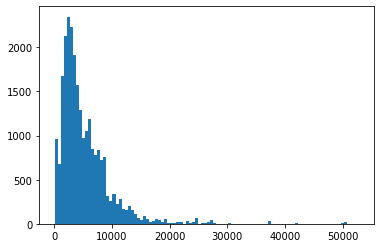

In [9]:
cens['density'] = cens['density']/0.00000038610
plt.hist(cens['density'], bins=100)
print(cens['density'].median()) # this figure looks good, albeit a bit high.

In [2]:
almost = gpd.read_file('../data/MSP/final/ship.shp')

In [3]:
#ugh
import aggregator as ag

In [4]:
points = almost['geometry'].to_crs(epsg=26915)
print(points)
new = []

for p in points:
    new.append(p.coords[0])
    
print(points[12])

0        POINT (490208.698 4979861.769)
1        POINT (472556.096 4998086.642)
2        POINT (478909.530 4974298.630)
3        POINT (483334.550 4973217.100)
4        POINT (498796.028 4976291.230)
                      ...              
24568    POINT (458004.045 4987624.348)
24569    POINT (494833.794 4987508.671)
24570    POINT (487378.547 4978213.070)
24571    POINT (481211.075 4975433.411)
24572    POINT (467043.852 4966630.916)
Name: geometry, Length: 24573, dtype: geometry
POINT (477752.0266776214 4968713.69015)


In [5]:
cover = ag.avgGrndCover(new, '../data/MSP/trees/tcma_clip.tif')

0.00019397984237442178% of points fell outside bounds


In [6]:
print(cover)

[[(1, 142), (2, 0), (3, 189), (4, 389), (5, 0), (6, 176), (7, 4), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 372), (2, 0), (3, 115), (4, 248), (5, 119), (6, 43), (7, 3), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 266), (2, 0), (3, 183), (4, 247), (5, 0), (6, 200), (7, 4), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 152), (2, 0), (3, 82), (4, 341), (5, 0), (6, 307), (7, 18), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 220), (2, 0), (3, 162), (4, 245), (5, 0), (6, 269), (7, 4), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 150), (2, 0), (3, 161), (4, 290), (5, 0), (6, 292), (7, 7), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 202), (2, 0), (3, 122), (4, 114), (5, 0), (6, 424), (7, 38), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 142), (2, 0), (3, 91), (4, 89), (5, 222), (6, 249), (7, 24), (8, 0), (9, 83), (10, 0), (11, 0), (12, 0)], [(1, 234), (2, 0), (3, 96), (4, 209), (5, 0), (6, 329), (7, 32), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)], [(1, 58), (2, 

In [7]:
almost['grnd'] = cover
print(almost)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
0        12600.0    166200.0    178800.0       0625          ST PAUL   
1        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
2        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
3        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
4        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24568   119000.0    199000.0    318000.0        284           MEDINA   
24569    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24570    35000.0    144600.0    179600.0       0625          ST PAUL   
24571    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24572    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse  avgAge       density  ...  \
0          1956   6298.780000   Res 1 unit    29.6   7622.1657

In [8]:
almost['buildCover'] = [g[2][1] for g in almost['grnd']]
decid = [g[5][1] for g in almost['grnd']]
conif = [g[6][1] for g in almost['grnd']]
almost['pvmnt'] = [g[3][1] for g in almost['grnd']]
almost['water'] = [g[4][1] for g in almost['grnd']]

almost['treecover'] = [d+c for d,c in zip (decid,conif)]
print(almost)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
0        12600.0    166200.0    178800.0       0625          ST PAUL   
1        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
2        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
3        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
4        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24568   119000.0    199000.0    318000.0        284           MEDINA   
24569    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24570    35000.0    144600.0    179600.0       0625          ST PAUL   
24571    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24572    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse  avgAge       density  ...  \
0          1956   6298.780000   Res 1 unit    29.6   7622.1657

In [16]:
# park distance
parkdist = ag.rastValAtPoints(new, '../data/MSP/parks/DistFromPark.tif')
print(parkdist)

[264.0, 396.0, 459.30383, 133.22162, 102.0, 454.45795, 815.2938, 99.31767, 264.06818, 232.99786, 254.69983, 184.83505, 144.49913, 30.0, 76.837494, 330.0, 177.27945, 220.78043, 250.63919, 437.5066, 362.4914, 48.0, 343.68008, 48.0, 48.0, 84.0, 382.7323, 367.76624, 524.78564, 192.84189, 138.52075, 593.72723, 246.0, 288.0625, 118.186295, 222.0, 182.87701, 486.0, 42.0, 539.2328, 330.43607, 463.6723, 617.1547, 161.55493, 104.95713, 433.49738, 193.2149, 600.0, 38.418747, 112.08925, 282.0638, 252.3569, 347.89655, 24.0, 150.11996, 132.0, 408.57312, 279.88568, 37.947334, 36.0, 265.08865, 287.12366, 42.426407, 186.0, 302.68796, 476.4242, 306.0, 206.45581, 126.57013, 150.0, 282.0, 305.76462, 48.0, 42.0, 541.4979, 66.0, 150.0, 126.0, 384.42163, 178.1909, 126.0, 230.51248, 690.65186, 132.0, 247.82251, 696.64624, 121.49074, 307.34998, 426.0, 599.91003, 24.0, 844.3815, 246.65765, 228.0, 276.06522, 108.166534, 349.85712, 174.4133, 186.2901, 76.36754, 131.59027, 305.76462, 320.9299, 356.78564, 54.0, 66.

In [17]:
cens['parkDist'] = parkdist

In [18]:
print(cens)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
1        12600.0    166200.0    178800.0       0625          ST PAUL   
2        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
3        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
4        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
5        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24996    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24997    35000.0    144600.0    179600.0       0625          ST PAUL   
24998    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24999        NaN     24000.0     24000.0       0621     NEW BRIGHTON   
25000    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse                    geometry  \
1          1956   6298.780000   Res 1 unit  POINT (-93.12417 

In [8]:
almost['water'] = [g[4][1] for g in almost['grnd']]

NameError: name 'cens' is not defined

In [9]:
almost.drop(['grnd'], axis=1, inplace=True)
print(almost)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
0        12600.0    166200.0    178800.0       0625          ST PAUL   
1        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
2        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
3        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
4        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24568   119000.0    199000.0    318000.0        284           MEDINA   
24569    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24570    35000.0    144600.0    179600.0       0625          ST PAUL   
24571    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24572    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse  avgAge       density  ...  \
0          1956   6298.780000   Res 1 unit    29.6   7622.1657

In [10]:
almost.to_file('../../almost/maybe.shp')

In [21]:
#anything super far gets taken out
c = cens[cens['parkDist']!= -1]
print(c)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
1        12600.0    166200.0    178800.0       0625          ST PAUL   
2        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
3        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
4        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
5        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24996    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24997    35000.0    144600.0    179600.0       0625          ST PAUL   
24998    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
24999        NaN     24000.0     24000.0       0621     NEW BRIGHTON   
25000    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse                    geometry  \
1          1956   6298.780000   Res 1 unit  POINT (-93.12417 

In [22]:
c = c[c['LandValue']> 0]
c = c[c['TotalValue']> 0]
c = c[c['BuildValue']> 0]

print(c)

       LandValue  BuildValue  TotalValue SchoolDist         CityName  \
1        12600.0    166200.0    178800.0       0625          ST PAUL   
2        80000.0    308200.0    388200.0        279    BROOKLYN PARK   
3        50500.0    196500.0    247000.0        001      MINNEAPOLIS   
4        26600.0    223400.0    250000.0        001      MINNEAPOLIS   
5        18600.0    221600.0    240200.0       0625          ST PAUL   
...          ...         ...         ...        ...              ...   
24995   119000.0    199000.0    318000.0        284           MEDINA   
24996    30000.0     94300.0    124300.0       0624  VADNAIS HEIGHTS   
24997    35000.0    144600.0    179600.0       0625          ST PAUL   
24998    30500.0    224500.0    255000.0        001      MINNEAPOLIS   
25000    87100.0    180900.0    268000.0        272     EDEN PRAIRIE   

      YearBuilt      SqMeters      LandUse                    geometry  \
1          1956   6298.780000   Res 1 unit  POINT (-93.12417 

(array([2.3074e+04, 1.3490e+03, 9.8000e+01, 3.7000e+01, 5.0000e+00,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.00000e+02, 4.20820e+05, 8.41340e+05, 1.26186e+06, 1.68238e+06,
        2.10290e+06, 2.52342e+06, 2.94394e+06, 3.36446e+06, 3.78498e+06,
        4.20550e+06]),
 <a list of 10 Patch objects>)

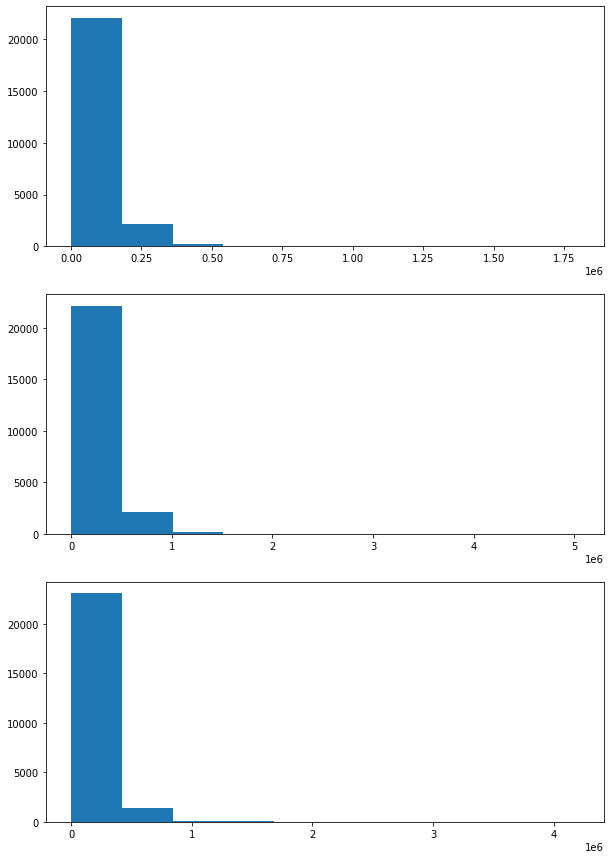

In [23]:
fig, ax = plt.subplots(3, figsize=(10,15))

ax[0].hist(c['LandValue'])
ax[1].hist(c['TotalValue'])
ax[2].hist(c['BuildValue'])

That's what I call acceptable!!!!!

In [24]:
c.to_file('../data/MSP/final/ship.shp')

In [25]:
ship = c.drop(['geometry'], axis=1)

In [78]:
ship.to_stata('../data/MSP/final/ship.dta')

In [26]:
ship.to_csv('../data/MSP/final/homeParks.csv')